# Smart finder of the neighborhood that better suits your desires!

## Table of Contents

# Table of contents
1. [Introduction](#introduction)
2. [Data selection](#dataselection)


## Introduction <a name="introduction"></a>

I recently moved to London and, while struggling to decide the appropriate neighoborhood where to move to. Several days spent on Google to look for the best suited neighborhood for me and my girlfriend, in a new and unknown city, was only causing me headache; but the problem with all these lists were they just looked like opinions and not based on data. Coming from a science background, I understood that what I needed were data to support my choice. 
I want to avoid my choice to be a coin toss, therefore my idea is to use available data to support my decision and avoid surprises... 

## Data Selection <a name="dataselection"></a>

In this project we will try to identify couple-friendly neighborhood in New York. This project is targeted towards young couples looking for new homes or stakeholders who offer housing to young couples.

Finding a suitable neighbourhood to base your future life is a challenge. Especially, in big cities like London. There are many variables to consider such as crime rates and easy access to venues such as Restaurants, Gyms, Pubs, and Libraries.

To determine which district to select, we will focus on neighborhoods with low crime rates and close to venues that meet young couple expectation, considering the following data

    Crime Rates for each neighbourhood
    Types of venues
    The Amount of personal best suited venues in each neighbourhood

We will extract Crime Rate data for each neighbourhood from 

Venues data will be obtained by using Foursquare API. 
The total number of venues within that Category will be calculated for each postal code.



In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])
import requests
import json
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup
import requests

import urllib3
urllib3.disable_warnings()

In [2]:
! pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 6.2 MB/s  eta 0:00:01


In [3]:
import folium

In [4]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_1a4a7592427d42e1b61840053f7aeeea = 'https://s3.eu.cloud-object-storage.appdomain.cloud'
else:
    endpoint_1a4a7592427d42e1b61840053f7aeeea = 'https://s3.eu.cloud-object-storage.appdomain.cloud'

client_1a4a7592427d42e1b61840053f7aeeea = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ie1Gw3nZukjj12oWVjYdcTgnIr5qoV4nFUWAQbbs0O40',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_1a4a7592427d42e1b61840053f7aeeea)

body = client_1a4a7592427d42e1b61840053f7aeeea.get_object(Bucket='anewindianrestaurantintown-donotdelete-pr-lpeffgueaygs4r',Key='NYPD_Complaint_Data_Historic.csv.part')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

crime = pd.read_csv(body)
print(crime.shape)
crime.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2297095, 35)


CMPLNT_NUM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM  \
0   700381962   05/28/2015     15:00:00          NaN          NaN   
1   642234217   10/28/2013     13:50:00   10/28/2013     13:50:00   
2   242465164   05/09/2012     20:50:00   05/09/2012     21:00:00   
3   927207428   01/03/2014     13:30:00   01/03/2014     13:35:00   
4   492142357   04/13/2016     00:00:00          NaN          NaN   

   ADDR_PCT_CD      RPT_DT  KY_CD                       OFNS_DESC  PD_CD  ...  \
0         46.0  06/01/2015    578                   HARRASSMENT 2  638.0  ...   
1        120.0  10/28/2013    351  CRIMINAL MISCHIEF & RELATED OF  259.0  ...   
2         24.0  05/09/2012    236               DANGEROUS WEAPONS  782.0  ...   
3        108.0  01/03/2014    109                   GRAND LARCENY  409.0  ...   
4         40.0  04/13/2016    351  CRIMINAL MISCHIEF & RELATED OF  258.0  ...   

  SUSP_SEX TRANSIT_DISTRICT   Latitude  Longitude  \
0        M              NaN  40.845868 -73.915888   
1      NaN              NaN  40.627061 -74.077149   
2      NaN              NaN  40.800966 -73.969047   
3        M              NaN  40.745242 -73.894253   
4      NaN              NaN  40.810352 -73.924942   

                         Lat_Lon                PATROL_BORO STATION_NAME  \
0   (40.84586773, -73.915888033)          PATROL BORO BRONX          NaN   
1  (40.627060894, -74.077149232)  PATROL BORO STATEN ISLAND          NaN   
2  (40.800965968, -73.969047272)      PATROL BORO MAN NORTH          NaN   
3  (40.745241809, -73.894253382)   PATROL BORO QUEENS NORTH          NaN   
4  (40.810351863, -73.924942326)          PATROL BORO BRONX          NaN   

   VIC_AGE_GROUP                  VIC_RACE VIC_SEX  
0          25-44            WHITE HISPANIC       F  
1          45-64                     WHITE       M  
2            NaN                   UNKNOWN       E  
3          45-64  ASIAN / PACIFIC ISLANDER       M  
4        UNKNOWN                   UNKNOWN       E  

[5 rows x 35 columns]

In [5]:
crime.drop(['CMPLNT_NUM','CRM_ATPT_CPTD_CD','CMPLNT_FR_TM','SUSP_RACE','SUSP_SEX','SUSP_AGE_GROUP','STATION_NAME','HOUSING_PSA','CMPLNT_TO_TM','X_COORD_CD','Y_COORD_CD','HADEVELOPT','PD_CD','KY_CD','CMPLNT_TO_DT','ADDR_PCT_CD','RPT_DT','JURISDICTION_CODE','JURIS_DESC','PREM_TYP_DESC','TRANSIT_DISTRICT','Lat_Lon','PATROL_BORO','JURISDICTION_CODE','PARKS_NM'],axis= 1, inplace= True)
crime.dropna(subset = ["Latitude"], inplace=True)
crime.dropna(subset = ["Longitude"], inplace=True)
crime.dropna(subset = ["CMPLNT_FR_DT"], inplace=True)
crime['Postal_Code'] = ''

In [6]:
crime[['month', 'day', 'year']] = crime['CMPLNT_FR_DT'].str.split('/', expand=True)
crime['year'] = pd.to_numeric(crime['year'])
#crime.sort_values(by="year",inplace=True, ascending=False)
#crime = crime[(crime['year'] > 2018)&(crime['VIC_AGE_GROUP'] = "25-44")&(crime['VIC_RACE'] = "WHITE")]  
crime = crime[(crime.year.isin([2018]))]
crime['CMPLNT_FR_DT'] = pd.to_datetime(crime.CMPLNT_FR_DT)
crime.sort_values(by="CMPLNT_FR_DT",inplace=True, ascending=False)
crime.reset_index(drop=True, inplace=True)


In [7]:
crime.shape
#crime = crime.head(1000)

(19665, 15)

In [8]:
for i in range(len(crime)):
    print(i,end = "\r")
    geolocator = Nominatim(user_agent='US_Explorer')
    Lat = crime.loc[i,'Latitude']
    Lon = crime.loc[i,'Longitude']
    #save to a tuple for use in geocoder
    p = (Lat, Lon)
    location = geolocator.reverse(p, timeout = 200)
    #if location is None:
        #continue
    raw = location.raw
    #print(raw)
    try:
        post = raw['address']['postcode'].split(' ')
        crime.loc[i,'Postal_Code'] = post[0]
    except KeyError:
        continue

In [9]:
crime_hist = crime

In [10]:
crime.dtypes

CMPLNT_FR_DT         datetime64[ns]
OFNS_DESC                    object
PD_DESC                      object
LAW_CAT_CD                   object
BORO_NM                      object
LOC_OF_OCCUR_DESC            object
Latitude                    float64
Longitude                   float64
VIC_AGE_GROUP                object
VIC_RACE                     object
VIC_SEX                      object
Postal_Code                  object
month                        object
day                          object
year                          int64
dtype: object

In [11]:
#Determine the unique postal codes and make sure that it only contains the prefix
crime['PC_Length'] = crime['Postal_Code'].str.len()
crime = crime[crime['PC_Length'] < 6]
crime.reset_index(drop=True, inplace=True)
crime.tail()

CMPLNT_FR_DT                       OFNS_DESC             PD_DESC  \
19470   2018-01-01                      SEX CRIMES    SEXUAL ABUSE 3,2   
19471   2018-01-01  CRIMINAL MISCHIEF & RELATED OF  CRIMINAL MIS 2 & 3   
19472   2018-01-01                      SEX CRIMES            SODOMY 1   
19473   2018-01-01                      SEX CRIMES    SEXUAL ABUSE 3,2   
19474   2018-01-01    ASSAULT 3 & RELATED OFFENSES           ASSAULT 3   

        LAW_CAT_CD    BORO_NM LOC_OF_OCCUR_DESC   Latitude  Longitude  \
19470  MISDEMEANOR  MANHATTAN            INSIDE  40.716196 -73.997491   
19471       FELONY     QUEENS            INSIDE  40.730041 -73.851655   
19472       FELONY     QUEENS            INSIDE  40.698737 -73.831569   
19473  MISDEMEANOR      BRONX            INSIDE  40.810396 -73.925311   
19474  MISDEMEANOR   BROOKLYN          FRONT OF  40.612279 -73.978841   

      VIC_AGE_GROUP        VIC_RACE VIC_SEX Postal_Code month day  year  \
19470           <18           BLACK       F       10013    01  01  2018   
19471         25-44           WHITE       F       11375    01  01  2018   
19472           <18  WHITE HISPANIC       F       11418    01  01  2018   
19473           <18           BLACK       F       10454    01  01  2018   
19474         25-44  WHITE HISPANIC       M       11204    01  01  2018   

       PC_Length  
19470          5  
19471          5  
19472          5  
19473          5  
19474          5

In [12]:
crime.rename(columns={'PC_Length': 'Crime_Incid'}, inplace=True)
crime['Crime_Incid'] = 1
crime.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


CMPLNT_FR_DT                       OFNS_DESC  \
0   2018-12-31  CRIMINAL MISCHIEF & RELATED OF   
1   2018-12-31                   PETIT LARCENY   
2   2018-12-31                   PETIT LARCENY   
3   2018-12-31                   PETIT LARCENY   
4   2018-12-31                   GRAND LARCENY   

                                             PD_DESC   LAW_CAT_CD    BORO_NM  \
0                     MISCHIEF, CRIMINAL 4, OF MOTOR  MISDEMEANOR      BRONX   
1                     LARCENY,PETIT OF LICENSE PLATE  MISDEMEANOR      BRONX   
2                            LARCENY,PETIT FROM AUTO  MISDEMEANOR      BRONX   
3                     LARCENY,PETIT FROM BUILDING,UN  MISDEMEANOR      BRONX   
4  LARCENY,GRAND BY BANK ACCT COMPROMISE-REPRODUC...       FELONY  MANHATTAN   

  LOC_OF_OCCUR_DESC   Latitude  Longitude VIC_AGE_GROUP        VIC_RACE  \
0          FRONT OF  40.828334 -73.911917         45-64  BLACK HISPANIC   
1          FRONT OF  40.841990 -73.924495           65+           BLACK   
2           REAR OF  40.825417 -73.905432         45-64           BLACK   
3            INSIDE  40.825064 -73.877397         45-64         UNKNOWN   
4            INSIDE  40.707118 -74.012229       UNKNOWN         UNKNOWN   

  VIC_SEX Postal_Code month day  year  Crime_Incid  
0       F       10456    12  31  2018            1  
1       F       10452    12  31  2018            1  
2       F       10456    12  31  2018            1  
3       F       10472    12  31  2018            1  
4       D       10003    12  31  2018            1

In [13]:
#Group by Postal Code
crime_grp = crime.groupby(['Postal_Code'],as_index = False).agg({'Latitude': 'mean','Longitude': 'mean', 'Crime_Incid': 'sum'})
print(crime_grp.shape)
crime_grp.head(30)

(200, 4)


Postal_Code   Latitude  Longitude  Crime_Incid
0               40.758709 -73.972742            2
1          100  40.769885 -73.989427           11
2        10001  40.749312 -73.993509          273
3        10002  40.716374 -73.987790          237
4        10003  40.728603 -73.991296          209
5        10004  40.704105 -74.011240           16
6        10005  40.712002 -74.008174           45
7        10006  40.707493 -74.014126           18
8        10007  40.714314 -74.009255           15
9        10008  40.710229 -74.007746            1
10       10009  40.725604 -73.980360          103
11       10010  40.738947 -73.984672           99
12       10011  40.741342 -73.999978          168
13       10012  40.724517 -73.998845          123
14       10013  40.717549 -74.002506          159
15       10014  40.733186 -74.005233           92
16       10016  40.744514 -73.979611          140
17       10017  40.751711 -73.974685           69
18       10018  40.753127 -73.990482           86
19       10019  40.758025 -73.987591          283
20       10020  40.750509 -73.983464            7
21       10021  40.769838 -73.958133           81
22       10022  40.758724 -73.967849          136
23       10023  40.774780 -73.983256          109
24       10024  40.786769 -73.975459          109
25       10025  40.797853 -73.968341          149
26       10026  40.802637 -73.951395          127
27       10027  40.811363 -73.951705          232
28       10028  40.777013 -73.954845           88
29       10029  40.792033 -73.945152          171

In [14]:
#Map Data

#obtain latitude and longitude for London
geolocator = Nominatim(user_agent='US_Explorer')
location1 = geolocator.geocode('New York, US')
ny_lat = location1.latitude
ny_lng = location1.longitude

#Create a map for London with all the Postal Codes Plotted
ny_map = folium.Map(location = [ny_lat, ny_lng], zoom_start = 11)
for lat, lng, post, crime in zip(crime_grp['Latitude'], crime_grp['Longitude'], crime_grp['Postal_Code'], crime_grp['Crime_Incid']):
    label = '{}: Crime: {}'.format(post, crime)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([lat, lng], 
                        radius = 5, 
                        popup = label, 
                        color = 'blue', 
                        fill = True, 
                        fill_opacity = 0.5, 
                       parse_html = False).add_to(ny_map)
ny_map

In [15]:
#Determine Distribution of Crime
crime_grp.describe()

Latitude   Longitude  Crime_Incid
count  200.000000  200.000000   200.000000
mean    40.726981  -73.925453    97.375000
std      0.078961    0.097875    71.015494
min     40.510452  -74.244637     1.000000
25%     40.678075  -73.982235    43.000000
50%     40.727830  -73.941234    91.500000
75%     40.773590  -73.860938   141.000000
max     40.898055  -73.705224   374.000000

Text(0, 0.5, '# of Crime Incidents')

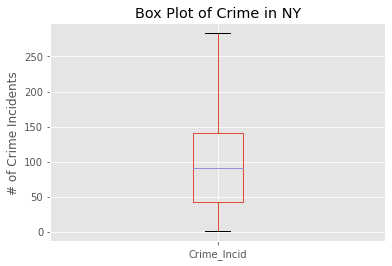

In [16]:
crime_grp['Crime_Incid'].plot(kind = 'box', showfliers=False)
plt.title('Box Plot of Crime in NY')
plt.ylabel('# of Crime Incidents')

Let's Map these data. We will assume that anything within the interquartile range is average amount of crime. Anything below is low crime (safe) and anything above is high crime (unsafe).

In [17]:
ny_crime_map = folium.Map(location = [ny_lat, ny_lng], zoom_start = 11)
for lat, lng, post, crime in zip(crime_grp['Latitude'], crime_grp['Longitude'], crime_grp['Postal_Code'], crime_grp['Crime_Incid']):
    label = '{}: Crime: {} incidents'.format(post, crime)
    label = folium.Popup(label, parse_html = True)
    if int(crime) < 43:
        color="green" 
    elif int(crime) >  140:
        color = "red"
    else: 
        color="yellow"
    folium.CircleMarker([lat, lng], 
                        radius = 4, 
                        popup = label, 
                        color = color,
                        fill = True, 
                        fill_opacity = 0.6, 
                        parse_html = False).add_to(ny_crime_map)
ny_crime_map

# Venue search

Lets now find the number of venues in each Postal Code.

In [18]:
# Insert Foursquare credential
CLIENT_ID = '15BVIWVORNZATBPR2UDHW2XHE0DS2B24KARGUWJ5JQDBCJ0X' # your Foursquare ID
CLIENT_SECRET = 'ZWUORIZXBPY4PPZ2QQUPLRYCQQXDSJWVHTS0TEJOIZHJBA35' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
Radius = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 15BVIWVORNZATBPR2UDHW2XHE0DS2B24KARGUWJ5JQDBCJ0X
CLIENT_SECRET:ZWUORIZXBPY4PPZ2QQUPLRYCQQXDSJWVHTS0TEJOIZHJBA35


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name,end = "\r")
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Postal Code', 
                  'Postal Code Latitude', 
                  'Postal Code Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
NY_venues = getNearbyVenues(names=crime_grp['Postal_Code'],
                                   latitudes=crime_grp['Latitude'],
                                   longitudes=crime_grp['Longitude']
                                  )

In [21]:
# one hot encoding
NY_onehot = pd.get_dummies(NY_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NY_onehot['Postal Code'] = NY_venues['Postal Code'] 

# move neighborhood column to the first column
fixed_columns = [NY_onehot.columns[-1]] + list(NY_onehot.columns[:-1])
NY_onehot = NY_onehot[fixed_columns]

NY_onehot.head()

NY_grouped = NY_onehot.groupby('Postal Code').mean().reset_index()

NY_grouped.shape

(199, 414)

The venues that are basic for my life and I want to have close to my home are the following

Italian Restaurants (Category Id: '4bf58dd8d48988d110941735')

Pools (Category Id: '4bf58dd8d48988d15e941735')

Gyms (Category Id: '4bf58dd8d48988d175941735')

Nightlife spots (Category Id: '4d4b7105d754a06376d81259')

In [22]:
# Define a function that will count the number of venues in each category
def Get_Number_Of_Venues(ID, category):
    for i in range(len(crime_grp)):
        print(i,end = "\r")
        p_lat =crime_grp.iloc[i,1]
        p_lon =crime_grp.iloc[i,2]
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,p_lat,p_lon,VERSION,ID,Radius,LIMIT) 
        test_results = requests.get(url).json()
        print(test_results)
        test_venue = test_results['response']['venues']
        count = np.shape(test_venue)
        crime_grp.loc[i, category] = count[0]

In [23]:
#Create empty columns for each Venue Type
crime_grp['Italian Restaurants'] = ''
crime_grp['Pools'] = ''
crime_grp['Gyms'] = ''
crime_grp['Nightlife spots'] = ''
crime_grp.head()

Postal_Code   Latitude  Longitude  Crime_Incid Italian Restaurants Pools  \
0              40.758709 -73.972742            2                             
1         100  40.769885 -73.989427           11                             
2       10001  40.749312 -73.993509          273                             
3       10002  40.716374 -73.987790          237                             
4       10003  40.728603 -73.991296          209                             

  Gyms Nightlife spots  
0                       
1                       
2                       
3                       
4

In [24]:
Get_Number_Of_Venues('4bf58dd8d48988d163941735','Parks')
Get_Number_Of_Venues( '4bf58dd8d48988d110941735','Italian Restaurants')
Get_Number_Of_Venues('4bf58dd8d48988d15e941735','Pools')
Get_Number_Of_Venues('4bf58dd8d48988d175941735','Gyms')
Get_Number_Of_Venues('4d4b7105d754a06376d81259','Nightlife spots')
crime_grp.head(30)

{'meta': {'code': 200, 'requestId': '60d5a20ef19dec040ffa06d3'}, 'response': {'venues': [{'id': '4bb8c2aa314e95211ab8489d', 'name': 'Samuel Paley Park', 'location': {'address': '3 E 53rd St', 'crossStreet': 'Fifth Ave', 'lat': 40.760336857114496, 'lng': -73.97501944098013, 'labeledLatLngs': [{'label': 'display', 'lat': 40.760336857114496, 'lng': -73.97501944098013}], 'distance': 264, 'postalCode': '10022', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3 E 53rd St (Fifth Ave)', 'New York, NY 10022', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613390', 'hasPerk': False}, {'id': '49c7955df964a520b0571fe3', 'name': 'Greenacre Park', 'location': {'address': '217 E 51st St', 'crossStreet': 'btwn 2nd & 3rd Ave', 'lat': 4

{'meta': {'code': 200, 'requestId': '60d5a20f5daf4c7d86eb9420'}, 'response': {'venues': [{'id': '4a034c41f964a520aa711fe3', 'name': 'Seward Park', 'location': {'address': '192 E Broadway', 'crossStreet': 'btwn Canal & Essex St', 'lat': 40.71483145632512, 'lng': -73.98954831890319, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71483145632512, 'lng': -73.98954831890319}], 'distance': 226, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['192 E Broadway (btwn Canal & Essex St)', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613391', 'hasPerk': False}, {'id': '516b030ae4b08b60e2a7eb15', 'name': 'Delancey Street "Park"', 'location': {'address': 'Delancey Street', 'crossStreet'

{'meta': {'code': 200, 'requestId': '60d5a20f8c1ee957bd2c30d8'}, 'response': {'venues': [{'id': '4ac90a44f964a5203fbe20e3', 'name': 'Coenties Slip Park', 'location': {'address': 'Coenties Slip', 'crossStreet': 'at Pearl St', 'lat': 40.703414969477464, 'lng': -74.01046349933438, 'labeledLatLngs': [{'label': 'display', 'lat': 40.703414969477464, 'lng': -74.01046349933438}], 'distance': 100, 'postalCode': '10004', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Coenties Slip (at Pearl St)', 'New York, NY 10004', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613391', 'hasPerk': False}, {'id': '3fd66200f964a520d9f11ee3', 'name': 'Bowling Green', 'location': {'address': 'Broadway and Whitehall St', 'lat': 40.70455599115943,

{'meta': {'code': 200, 'requestId': '60d5a20f453f00347eb73f13'}, 'response': {'venues': [{'id': '3fd66200f964a520d8f11ee3', 'name': 'City Hall Park', 'location': {'address': '17 Park Row', 'crossStreet': 'btwn Broadway & Centre St', 'lat': 40.712359027088745, 'lng': -74.00749317653569, 'distance': 69, 'postalCode': '10038', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['17 Park Row (btwn Broadway & Centre St)', 'New York, NY 10038', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613391', 'hasPerk': False}, {'id': '576c2212498e72c8c38f1ddd', 'name': 'Liberty Park', 'location': {'address': 'Liberty St', 'crossStreet': 'at West St', 'lat': 40.71038391621699, 'lng': -74.01386844682942, 'labeledLatLngs': [{'label': 'displa

{'meta': {'code': 200, 'requestId': '60d5a210fa1c31235448ace6'}, 'response': {'venues': [{'id': '4c9dfed503133704e70864d5', 'name': 'Bogardus Plaza', 'location': {'address': 'Hudson St', 'lat': 40.71596196281913, 'lng': -74.00906372147466, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71596196281913, 'lng': -74.00906372147466}], 'distance': 184, 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Hudson St', 'New York, NY 10013', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d164941735', 'name': 'Plaza', 'pluralName': 'Plazas', 'shortName': 'Plaza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/plaza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613392', 'hasPerk': False}, {'id': '4c3cb549b36ac9285d7a0486', 'name': 'Duane Park', 'location': {'address': 'Duane St', 'crossStreet': 'at Hudson St', 'lat': 40.71717275801168, 'lng': -74.00932869125117, 'labeledLatLngs

{'meta': {'code': 200, 'requestId': '60d5a210a441b30b7af16a2b'}, 'response': {'venues': [{'id': '408c5100f964a520c6f21ee3', 'name': 'Tompkins Square Park', 'location': {'address': 'E 7th St to E 10th St', 'crossStreet': 'btwn Ave A & B', 'lat': 40.72635671253812, 'lng': -73.98232284448763, 'distance': 185, 'postalCode': '10009', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['E 7th St to E 10th St (btwn Ave A & B)', 'New York, NY 10009', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613392', 'hasPerk': False}, {'id': '49d8dc84f964a520d05d1fe3', 'name': 'La Plaza Cultural Community Garden', 'location': {'address': '648 E. 9th St', 'crossStreet': 'Avenue C', 'lat': 40.72535739123432, 'lng': -73.97854113535178, 'labeledL

{'meta': {'code': 200, 'requestId': '60d5a211ee2d180ebfcc9e3b'}, 'response': {'venues': [{'id': '4bba4d0a1261d13a5677ea98', 'name': 'Dr. Gertrude B. Kelly Playground', 'location': {'address': '16th Street', 'crossStreet': '8th Avenue', 'lat': 40.74135553934005, 'lng': -74.00153748543518, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74135553934005, 'lng': -74.00153748543518}], 'distance': 131, 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['16th Street (8th Avenue)', 'New York, NY 10011', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1e7941735', 'name': 'Playground', 'pluralName': 'Playgrounds', 'shortName': 'Playground', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/playground_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613393', 'hasPerk': False}, {'id': '4a61faabf964a520c0c21fe3', 'name': 'Jackson Square', 'location': {'address': '13th St at 8th Ave', '

{'meta': {'code': 200, 'requestId': '60d5a2112da8845d361a1c57'}, 'response': {'venues': [{'id': '4bab9fe3f964a52052ba3ae3', 'name': 'Collect Pond Park', 'location': {'address': 'Lafayette St', 'crossStreet': 'btwn Franklin & Leonard St', 'lat': 40.71632835180143, 'lng': -74.00185167789459, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71632835180143, 'lng': -74.00185167789459}], 'distance': 146, 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Lafayette St (btwn Franklin & Leonard St)', 'New York, NY 10013', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613393', 'hasPerk': False}, {'id': '4c3cb549b36ac9285d7a0486', 'name': 'Duane Park', 'location': {'address': 'Duane St', 'crossStreet': 'at H

{'meta': {'code': 200, 'requestId': '60d5a2114798e163c5a51df2'}, 'response': {'venues': [{'id': '5377bced498ee37571706fe9', 'name': '14th Street Union Square NYC', 'location': {'lat': 40.74787345208075, 'lng': -73.98484232195737, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74787345208075, 'lng': -73.98484232195737}], 'distance': 578, 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613393', 'hasPerk': False}, {'id': '4c12d1b67f7f2d7f8d0cde68', 'name': 'St. Vartan Park', 'location': {'address': '2nd Ave & E 36th St', 'lat': 40.74519645099352, 'lng': -73.97371530532837, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74519645099352, 'lng': -73.973715305

{'meta': {'code': 200, 'requestId': '60d5a212f9e12a44d671d0f3'}, 'response': {'venues': [{'id': '4ba10a53f964a520bc9137e3', 'name': 'Golda Meir Square', 'location': {'address': '1411 Broadway', 'crossStreet': '40th street', 'lat': 40.75378106802277, 'lng': -73.98737128231818, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75378106802277, 'lng': -73.98737128231818}], 'distance': 272, 'postalCode': '10018', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1411 Broadway (40th street)', 'New York, NY 10018', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613394', 'hasPerk': False}, {'id': '4a299005f964a520a8951fe3', 'name': 'Greeley Square', 'location': {'address': '968 Avenue of the Americas', 'crossStreet': 'btwn W 32n

{'meta': {'code': 200, 'requestId': '60d5a212ee2d180ebfcca10b'}, 'response': {'venues': [{'id': '5156fbe5e4b03f6bbba1215a', 'name': 'Hyungki Park', 'location': {'address': '53 W 36th St', 'lat': 40.751091635007896, 'lng': -73.98614012967526, 'labeledLatLngs': [{'label': 'display', 'lat': 40.751091635007896, 'lng': -73.98614012967526}, {'label': 'entrance', 'lat': 40.750771, 'lng': -73.985891}], 'distance': 234, 'postalCode': '10018', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['53 W 36th St', 'New York, NY 10018', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613394', 'hasPerk': False}, {'id': '4e5fe0cbb3ad629a3a2b8c65', 'name': 'William Cullen Bryant Memorial', 'location': {'address': 'Bryant Park', 'crossStreet':

{'meta': {'code': 200, 'requestId': '60d5a212255d54673a3ccf03'}, 'response': {'venues': [{'id': '4c29160ee19720a1e8f4f858', 'name': 'Poses Park', 'location': {'address': 'E. 68th b/t Lexington and 3rd Ave.', 'lat': 40.76762158717239, 'lng': -73.96342858134595, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76762158717239, 'lng': -73.96342858134595}], 'distance': 510, 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['E. 68th b/t Lexington and 3rd Ave.', 'New York, NY 10021', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613394', 'hasPerk': False}, {'id': '535d691b11d2006cad8872de', 'name': 'Grande Parco Centrale', 'location': {'lat': 40.770997030061274, 'lng': -73.96427805945872, 'labeledLatLngs

{'meta': {'code': 200, 'requestId': '60d5a213ee2d180ebfcca231'}, 'response': {'venues': [{'id': '4bbe24468ca376b0f45ec77a', 'name': 'Richard Tucker Square', 'location': {'address': '134 Columbus Ave', 'crossStreet': 'at W 66th St', 'lat': 40.77357467300629, 'lng': -73.98196054620766, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77357467300629, 'lng': -73.98196054620766}], 'distance': 172, 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['134 Columbus Ave (at W 66th St)', 'New York, NY 10023', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d164941735', 'name': 'Plaza', 'pluralName': 'Plazas', 'shortName': 'Plaza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/plaza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613395', 'hasPerk': False}, {'id': '501c3723e4b09fbdebbacc04', 'name': 'Hearst Plaza', 'location': {'lat': 40.772977013382466, 'lng': -73.98364284819401,

{'meta': {'code': 200, 'requestId': '60d5a213453f00347eb745db'}, 'response': {'venues': [{'id': '5cbf18c11ffe97002c7849f7', 'name': 'Riverside Park @ 99th St', 'location': {'address': 'Riverside Dr', 'crossStreet': '99th St', 'lat': 40.797866, 'lng': -73.973477, 'labeledLatLngs': [{'label': 'display', 'lat': 40.797866, 'lng': -73.973477}], 'distance': 432, 'postalCode': '10025', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Riverside Dr (99th St)', 'New York, NY 10025', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613395', 'hasPerk': False}, {'id': '4f1e9c9ee4b07fde7ead00a8', 'name': 'Central Park 4 Mile Loop', 'location': {'address': 'West 102nd Street', 'crossStreet': 'Central Park West', 'lat': 40.80252779434895

{'meta': {'code': 200, 'requestId': '60d5a2133718266d0638ec33'}, 'response': {'venues': [{'id': '4cb5f3108db0a14374546616', 'name': 'Roosevelt Triangle', 'location': {'address': 'W 125th St', 'crossStreet': 'Morningside Ave', 'lat': 40.81150498512449, 'lng': -73.95439403540375, 'labeledLatLngs': [{'label': 'display', 'lat': 40.81150498512449, 'lng': -73.95439403540375}], 'distance': 227, 'postalCode': '10027', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['W 125th St (Morningside Ave)', 'New York, NY 10027', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613395', 'hasPerk': False}, {'id': '4bd32a1441b9ef3b816bffe5', 'name': 'Harriet Tubman Memorial', 'location': {'address': 'W 122nd St', 'crossStreet': 'Frederick Doug

{'meta': {'code': 200, 'requestId': '60d5a2142da8845d361a220c'}, 'response': {'venues': [{'id': '4c0a752b6071a5932689df32', 'name': 'Ralph Ellison Memorial Park', 'location': {'address': 'Riverside Drive', 'crossStreet': '@ West 150th & RSD', 'lat': 40.83017710272145, 'lng': -73.94976854324341, 'labeledLatLngs': [{'label': 'display', 'lat': 40.83017710272145, 'lng': -73.94976854324341}], 'distance': 472, 'postalCode': '10031', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Riverside Drive (@ West 150th & RSD)', 'New York, NY 10031', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613396', 'hasPerk': False}, {'id': '4e4d6c1ad4c019a18a3b3192', 'name': 'Hudson Trail', 'location': {'lat': 40.82815176658057, 'lng': -73.9532

{'meta': {'code': 200, 'requestId': '60d5a214a441b30b7af1720a'}, 'response': {'venues': [{'id': '4bd341d79854d13a834ffd4d', 'name': 'Highest Natural Point In Manhattan', 'location': {'address': 'Pinehurst', 'crossStreet': '185th street', 'lat': 40.852843004488385, 'lng': -73.93764973534918, 'labeledLatLngs': [{'label': 'display', 'lat': 40.852843004488385, 'lng': -73.93764973534918}], 'distance': 429, 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Pinehurst (185th street)', 'New York, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613396', 'hasPerk': False}, {'id': '4c150c5b7f7f2d7fc0c3e168', 'name': 'Dolphin Park', 'location': {'address': '854 W 180th St', 'crossStreet': 'Cabrini', 'lat': 40.850117, 'lng': -73.9

{'meta': {'code': 200, 'requestId': '60d5a215453f00347eb749e3'}, 'response': {'venues': [{'id': '4c264842905a0f474efd6260', 'name': 'Mae Grant Park', 'location': {'lat': 40.792620874121795, 'lng': -73.94916482618012, 'labeledLatLngs': [{'label': 'display', 'lat': 40.792620874121795, 'lng': -73.94916482618012}], 'distance': 178, 'postalCode': '10029', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY 10029', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613397', 'hasPerk': False}, {'id': '4c72f2421b11199caf9a5c13', 'name': "Pioneers' Gate", 'location': {'address': '944 5th Ave', 'crossStreet': 'East 110th St.', 'lat': 40.792023410946506, 'lng': -73.9455877465435, 'labeledLatLngs': [{'label': 'display', 'lat'

{'meta': {'code': 200, 'requestId': '60d5a215927a316dc4b48b7e'}, 'response': {'venues': [{'id': '4a1e08c5f964a520bc7b1fe3', 'name': 'Jackie Robinson Park', 'location': {'address': 'W 150th St & Bradhurst Ave', 'crossStreet': 'at 145th Street', 'lat': 40.82345140669702, 'lng': -73.93634581058635, 'labeledLatLngs': [{'label': 'display', 'lat': 40.82345140669702, 'lng': -73.93634581058635}], 'distance': 267, 'postalCode': '10039', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['W 150th St & Bradhurst Ave (at 145th Street)', 'New York, NY 10039', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613397', 'hasPerk': False}, {'id': '4b5808a6f964a520414928e3', 'name': 'Rucker Park Basketball Courts', 'location': {'address': '293

{'meta': {'code': 200, 'requestId': '60d5a216081d00029ccdef34'}, 'response': {'venues': [{'id': '4aedf5a2f964a520a7d021e3', 'name': 'Bobby Wagner Walk', 'location': {'address': 'East River', 'crossStreet': 'btw 63rd & 125th St', 'lat': 40.764843900829774, 'lng': -73.95197868347168, 'labeledLatLngs': [{'label': 'display', 'lat': 40.764843900829774, 'lng': -73.95197868347168}], 'distance': 293, 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['East River (btw 63rd & 125th St)', 'New York, NY 10028', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613398', 'hasPerk': False}, {'id': '4bb65d7b6edc76b087d2301c', 'name': 'John Finley Walk', 'location': {'address': 'FDR Dr', 'crossStreet': 'btwn E 63rd St &

{'meta': {'code': 200, 'requestId': '60d5a216d283ea16935b98d5'}, 'response': {'venues': [{'id': '4adf50e7f964a520627921e3', 'name': 'Riverside Park South', 'location': {'address': 'Riverside Blvd', 'crossStreet': '65th & 72nd Sts', 'lat': 40.77832352747964, 'lng': -73.98911118507385, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77832352747964, 'lng': -73.98911118507385}], 'distance': 202, 'postalCode': '10069', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Riverside Blvd (65th & 72nd Sts)', 'New York, NY 10069', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613398', 'hasPerk': False}, {'id': '5f9431e0fb83506e4af91426', 'name': 'Riverside Park Phase 5', 'location': {'lat': 40.77704, 'lng': -73.989048, 'labeledLa

{'meta': {'code': 200, 'requestId': '60d5a216069bfd7733c30893'}, 'response': {'venues': [{'id': '5136511fe4b0f0a0df48f57a', 'name': 'Central Park rock at 7th Avenue Playground', 'location': {'lat': 40.76522247828217, 'lng': -73.98186371063801, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76522247828217, 'lng': -73.98186371063801}], 'distance': 250, 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613399', 'hasPerk': False}, {'id': '5177fffbe4b0a04acb3ab3f0', 'name': 'Worldwide Plaza Park', 'location': {'crossStreet': '49th & 9th Ave', 'lat': 40.76248848010191, 'lng': -73.98745742768365, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76248848010191, 'l

{'meta': {'code': 200, 'requestId': '60d5a217069bfd7733c3094d'}, 'response': {'venues': [{'id': '4c3f61efcc410f473717a861', 'name': '"I Wish This Fountain Was A Pool"', 'location': {'address': '1260 Avenue of the Americas', 'lat': 40.760135650634766, 'lng': -73.98004913330078, 'labeledLatLngs': [{'label': 'display', 'lat': 40.760135650634766, 'lng': -73.98004913330078}], 'distance': 299, 'postalCode': '10020', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1260 Avenue of the Americas', 'New York, NY 10020', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613399', 'hasPerk': False}, {'id': '5136511fe4b0f0a0df48f57a', 'name': 'Central Park rock at 7th Avenue Playground', 'location': {'lat': 40.76522247828217, 'lng': -73.

{'meta': {'code': 200, 'requestId': '60d5a2173d8cb038797726cb'}, 'response': {'venues': [{'id': '4a884dc2f964a520d10520e3', 'name': 'Ruppert Park', 'location': {'address': '2nd Ave', 'crossStreet': 'btwn E 90th & E 91st St', 'lat': 40.78102887344622, 'lng': -73.95017087459563, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78102887344622, 'lng': -73.95017087459563}], 'distance': 103, 'postalCode': '10128', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2nd Ave (btwn E 90th & E 91st St)', 'New York, NY 10128', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613399', 'hasPerk': False}, {'id': '4d5137429ffc236aa88e20a7', 'name': 'Skanska 96th Street Yard', 'location': {'lat': 40.78236472007747, 'lng': -73.9503385592205

{'meta': {'code': 200, 'requestId': '60d5a218927a316dc4b48f75'}, 'response': {'venues': [{'id': '49c7955df964a520b0571fe3', 'name': 'Greenacre Park', 'location': {'address': '217 E 51st St', 'crossStreet': 'btwn 2nd & 3rd Ave', 'lat': 40.756307089955506, 'lng': -73.96928710389531, 'labeledLatLngs': [{'label': 'display', 'lat': 40.756307089955506, 'lng': -73.96928710389531}], 'distance': 156, 'postalCode': '10022', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['217 E 51st St (btwn 2nd & 3rd Ave)', 'New York, NY 10022', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d164941735', 'name': 'Plaza', 'pluralName': 'Plazas', 'shortName': 'Plaza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/plaza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613400', 'hasPerk': False}, {'id': '4c4f268bfb742d7ffe1e792f', 'name': 'Brevard Park', 'location': {'address': 'E 55th St', 'crossStreet': 'btwn 2nd & 3

{'meta': {'code': 200, 'requestId': '60d5a218b6d705494cde5b4d'}, 'response': {'venues': [{'id': '4c7f9ddefb74236a1385fab9', 'name': '14 Honey Locusts Park', 'location': {'address': 'between 1st & 2nd ave', 'lat': 40.76006059493211, 'lng': -73.96312458040266, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76006059493211, 'lng': -73.96312458040266}], 'distance': 302, 'postalCode': '10022', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['between 1st & 2nd ave', 'New York, NY 10022', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613400', 'hasPerk': False}, {'id': '4f4ffb26e4b0fb02d2be0dbb', 'name': 'Twenty Four Sycamores Park', 'location': {'lat': 40.760167337466186, 'lng': -73.95849235071195, 'labeledLatLngs': [{'labe

{'meta': {'code': 200, 'requestId': '60d5a21833b2524405a22afa'}, 'response': {'venues': [{'id': '4d3618b41b39224b302d9887', 'name': '20 Park Avenue', 'location': {'address': '20 Park Ave', 'lat': 40.74839498903511, 'lng': -73.98142098438083, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74839498903511, 'lng': -73.98142098438083}], 'distance': 76, 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['20 Park Ave', 'New York, NY 10016', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613400', 'hasPerk': False}, {'id': '53cf8ad5498eb01017cbfc47', 'name': 'St. Vartan Park Basketball Courts', 'location': {'lat': 40.74546008397952, 'lng': -73.97550459405238, 'labeledLatLngs': [{'label': 'display', 'lat': 

{'meta': {'code': 200, 'requestId': '60d5a2198c1ee957bd2c4287'}, 'response': {'venues': [{'id': '4ba659e5f964a520454939e3', 'name': 'Sandbox Park', 'location': {'crossStreet': '26th and 8th Avenue', 'lat': 40.74807702076022, 'lng': -73.99749851327998, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74807702076022, 'lng': -73.99749851327998}], 'distance': 329, 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY 10001', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613401', 'hasPerk': False}, {'id': '49d0b250f964a5202c5b1fe3', 'name': 'Chelsea Park', 'location': {'address': '10 Avenue A', 'crossStreet': 'btwn W 27th & W 28th St', 'lat': 40.75031094028699, 'lng': -74.0014496409983, 'labe

{'meta': {'code': 200, 'requestId': '60d5a21942839116abacf02e'}, 'response': {'venues': [{'id': '4e04e1b11f6e1a1c6d2a6669', 'name': 'Hudson River Greenway At Battery Place', 'location': {'lat': 40.70715602912223, 'lng': -74.01736712311256, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70715602912223, 'lng': -74.01736712311256}], 'distance': 25, 'cc': 'US', 'state': 'New York', 'country': 'United States', 'formattedAddress': ['New York', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613401', 'hasPerk': False}, {'id': '4c1164576e5dc9b69506b02d', 'name': 'Battery Park City Esplanade', 'location': {'address': 'Battery Park City', 'crossStreet': 'From Chambers St to Battery Park', 'lat': 40.71162184551406, 'lng': -74.01790738105774, 'labeledLatLngs': [{'label': 'disp

{'meta': {'code': 200, 'requestId': '60d5a21911af0c626727864b'}, 'response': {'venues': [{'id': '4f5f423fe4b0949d4183d34a', 'name': 'Silverstein Family Park', 'location': {'address': 'Barcley St', 'crossStreet': 'at Greenwich St', 'lat': 40.7132612824142, 'lng': -74.0115237236023, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7132612824142, 'lng': -74.0115237236023}], 'distance': 245, 'postalCode': '10007', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Barcley St (at Greenwich St)', 'New York, NY 10007', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613401', 'hasPerk': False}, {'id': '4bd351c6462cb7130226de07', 'name': 'Warren Street Dog Park', 'location': {'address': 'Warren St', 'crossStreet': 'btwn Greenwich 

{'meta': {'code': 200, 'requestId': '60d5a21ae87a100d58c4fe0e'}, 'response': {'venues': [{'id': '4be1bd574283c9b6125454f8', 'name': 'Fort Hill', 'location': {'lat': 40.641511256193546, 'lng': -74.08052248085447, 'labeledLatLngs': [{'label': 'display', 'lat': 40.641511256193546, 'lng': -74.08052248085447}], 'distance': 597, 'cc': 'US', 'state': 'New York', 'country': 'United States', 'formattedAddress': ['New York', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613402', 'hasPerk': False}, {'id': '4edad154b6344371f770770a', 'name': "Farley's New Playground", 'location': {'address': '4 Nixon Ave', 'lat': 40.632644, 'lng': -74.082887, 'labeledLatLngs': [{'label': 'display', 'lat': 40.632644, 'lng': -74.082887}, {'label': 'entrance', 'lat': 40.632686, 'lng': -74.082848}]

{'meta': {'code': 200, 'requestId': '60d5a21b843c1720d05bfb4e'}, 'response': {'venues': [{'id': '52486b2e11d240adbf8085a3', 'name': 'Sneak Peek @ Fiehkills', 'location': {'lat': 40.588288, 'lng': -74.191591, 'labeledLatLngs': [{'label': 'display', 'lat': 40.588288, 'lng': -74.191591}], 'distance': 201, 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Staten Island, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613403', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a21b0a93c65c3d4d333e'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a21c5daf4c7d86ebacf2'}, 'response': {'venues': [{'id': '4df0cad61838e429ae51a43b', 'name': 'Gaeta Park', 'location': {'a

{'meta': {'code': 200, 'requestId': '60d5a21d9d13f207b74b52bb'}, 'response': {'venues': [{'id': '51b73f24498e74bb63f7311a', 'name': 'Estella Diggs Park', 'location': {'address': '167street', 'crossStreet': 'Fulton Ave', 'lat': 40.829151, 'lng': -73.905706, 'labeledLatLngs': [{'label': 'display', 'lat': 40.829151, 'lng': -73.905706}], 'distance': 273, 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['167street (Fulton Ave)', 'Bronx, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613405', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a21d97cf8309c07d1190'}, 'response': {'venues': [{'id': '4b6beac4f964a5207c1c2ce3', 'name': 'Echo Park', 'location': {'lat': 40.84934793977378, 'lng': -73.

{'meta': {'code': 200, 'requestId': '60d5a21d4db2c53fad76df13'}, 'response': {'venues': [{'id': '4e0658fcd4c03ae0b9c3552b', 'name': 'Vidalia Park', 'location': {'address': '180th Street and Daly Ave.', 'lat': 40.84434023892913, 'lng': -73.88150645421123, 'labeledLatLngs': [{'label': 'display', 'lat': 40.84434023892913, 'lng': -73.88150645421123}], 'distance': 506, 'postalCode': '10460', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['180th Street and Daly Ave.', 'Bronx, NY 10460', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613405', 'hasPerk': False}, {'id': '4b006a75f964a520f43d22e3', 'name': 'River Park', 'location': {'address': '1040 East 180th St', 'crossStreet': 'Boston Rd', 'lat': 40.84306197093502, 'lng': -73.87

{'meta': {'code': 200, 'requestId': '60d5a21e2da8845d361a35a4'}, 'response': {'venues': [{'id': '4e0cd054aeb7af850d6c7dfd', 'name': 'Hawkins Street Park', 'location': {'address': '281 City Island Ave', 'crossStreet': 'hawkin st', 'lat': 40.84659957885742, 'lng': -73.7865219116211, 'labeledLatLngs': [{'label': 'display', 'lat': 40.84659957885742, 'lng': -73.7865219116211}], 'distance': 309, 'postalCode': '10464', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['281 City Island Ave (hawkin st)', 'Bronx, NY 10464', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613406', 'hasPerk': False}, {'id': '53b1d8ec498e8cd0833b77f0', 'name': 'Ambrosia Park', 'location': {'lat': 40.8441821465368, 'lng': -73.78531806941565, 'labeledLatLng

{'meta': {'code': 200, 'requestId': '60d5a21fe51a6b1c29b17f1f'}, 'response': {'venues': [{'id': '4c1ceb54b4e62d7fcfc6db93', 'name': 'St. James Park', 'location': {'address': 'Jerome Avenue', 'crossStreet': '192nd St.', 'lat': 40.86654342003384, 'lng': -73.89547843697086, 'labeledLatLngs': [{'label': 'display', 'lat': 40.86654342003384, 'lng': -73.89547843697086}], 'distance': 378, 'postalCode': '10468', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Jerome Avenue (192nd St.)', 'Bronx, NY 10468', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613407', 'hasPerk': False}, {'id': '51dd7627498e6aab76ede733', 'name': 'Liza Torres Park', 'location': {'address': '2590 Briggs Ave', 'crossStreet': '194th Street', 'lat': 40.8654953

{'meta': {'code': 200, 'requestId': '60d5a220fa1c31235448cb67'}, 'response': {'venues': [{'id': '4bbc9e9b8ec3d13a54f71a28', 'name': 'Barretto Point Park', 'location': {'address': 'Tiffany St', 'crossStreet': 'at Viele Ave', 'lat': 40.80581484210009, 'lng': -73.88857378778161, 'labeledLatLngs': [{'label': 'display', 'lat': 40.80581484210009, 'lng': -73.88857378778161}], 'distance': 527, 'postalCode': '10474', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Tiffany St (at Viele Ave)', 'Bronx, NY 10474', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613408', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a220843c1720d05c04e7'}, 'response': {'venues': [{'id': '4c2e86a016adc9282f15bc9c', 'na

{'meta': {'code': 200, 'requestId': '60d5a221b9198971374c4d29'}, 'response': {'venues': [{'id': '5d208da6c56f4800230dcef9', 'name': 'Astoria Heights Tennis Courts', 'location': {'lat': 40.760185, 'lng': -73.91157, 'labeledLatLngs': [{'label': 'display', 'lat': 40.760185, 'lng': -73.91157}], 'distance': 515, 'postalCode': '11103', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Queens, NY 11103', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613409', 'hasPerk': False}, {'id': '51b376e3498e8399a33fbd28', 'name': 'P.S. 10 Park', 'location': {'lat': 40.75968716952733, 'lng': -73.91320516760383, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75968716952733, 'lng': -73.91320516760383}], 'distance': 526, 'cc': 'US', 'city':

{'meta': {'code': 200, 'requestId': '60d5a222e1ca847e91e68abe'}, 'response': {'venues': [{'id': '4b92cc85f964a520e01c34e3', 'name': "Hunter's Point Community Park", 'location': {'lat': 40.7450325622929, 'lng': -73.95322532118081, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7450325622929, 'lng': -73.95322532118081}], 'distance': 174, 'postalCode': '11101', 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Long Island City, NY 11101', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613410', 'hasPerk': False}, {'id': '521cd1c293cd469ce13dbb47', 'name': "Hunter's Point South Park", 'location': {'address': 'Center Boulevard and Borden Avenue', 'crossStreet': 'Center Boulevard and Borden Avenue', 'lat': 40.742631898404746, 

{'meta': {'code': 200, 'requestId': '60d5a22216b36c17889bc184'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2221e8c314e8e396054'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a222b9bfcc2b14f3510f'}, 'response': {'venues': [{'id': '4e53f3a252b1c616cd234703', 'name': 'Pratt Lawn Next To The Main Lawn', 'location': {'lat': 40.690367466088034, 'lng': -73.96506439734894, 'labeledLatLngs': [{'label': 'display', 'lat': 40.690367466088034, 'lng': -73.96506439734894}], 'distance': 322, 'postalCode': '11205', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Brooklyn, NY 11205', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613411', 'hasPerk': False}, {'id': '4c9793c6533aa093433

{'meta': {'code': 200, 'requestId': '60d5a224f9e12a44d671f4a7'}, 'response': {'venues': [{'id': '4c8b7be09ef0224b1e6f647b', 'name': 'Betsy Head Memorial Playground', 'location': {'address': 'Blake Ave.', 'crossStreet': 'btwn Bristol And Hopkinson', 'lat': 40.663654874260054, 'lng': -73.91321090882144, 'labeledLatLngs': [{'label': 'display', 'lat': 40.663654874260054, 'lng': -73.91321090882144}], 'distance': 76, 'postalCode': '11212', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Blake Ave. (btwn Bristol And Hopkinson)', 'New York, NY 11212', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613412', 'hasPerk': False}, {'id': '51683691498e504d0f9016a9', 'name': 'Green Street Park', 'location': {'lat': 40.66519972097008, 

{'meta': {'code': 200, 'requestId': '60d5a2255daf4c7d86ebbefd'}, 'response': {'venues': [{'id': '5d4c3e42816c150008ee6d66', 'name': 'Betty Carter Park', 'location': {'address': 'Lafayette Ave', 'crossStreet': 'at Fulton St', 'lat': 40.687128, 'lng': -73.977101, 'labeledLatLngs': [{'label': 'display', 'lat': 40.687128, 'lng': -73.977101}], 'distance': 379, 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Lafayette Ave (at Fulton St)', 'Brooklyn, NY 11217', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613413', 'hasPerk': False}, {'id': '4facfb466b7483befd13cdc1', 'name': 'DEP Dean Street Bioswales', 'location': {'address': 'Dean Street', 'crossStreet': '4th Avenue', 'lat': 40.6830788593603, 'lng':

{'meta': {'code': 200, 'requestId': '60d5a22689876d1f04ae214f'}, 'response': {'venues': [{'id': '4f53ac06e4b0ddd8f869944c', 'name': 'Ebbets Field Playground', 'location': {'lat': 40.66570425398703, 'lng': -73.95923279335794, 'labeledLatLngs': [{'label': 'display', 'lat': 40.66570425398703, 'lng': -73.95923279335794}], 'distance': 582, 'postalCode': '11225', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Brooklyn, NY 11225', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613414', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a227f19dec040ffa36ab'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2271e8c314e8e39691f'}, 'response': {'venues': [{'id': '5d4c3e42816c

{'meta': {'code': 200, 'requestId': '60d5a2285daf4c7d86ebc4c6'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2281e8c314e8e396bdf'}, 'response': {'venues': [{'id': '5ba3afc1dab4b1002c1d609e', 'name': '100% Playground', 'location': {'crossStreet': 'Glenwood Road', 'lat': 40.64670169358093, 'lng': -73.89840887265129, 'labeledLatLngs': [{'label': 'display', 'lat': 40.64670169358093, 'lng': -73.89840887265129}], 'distance': 473, 'postalCode': '11236', 'cc': 'US', 'neighborhood': 'Canarsie', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Glenwood Road', 'Brooklyn, NY 11236', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613416', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d

{'meta': {'code': 200, 'requestId': '60d5a2294db2c53fad76f65c'}, 'response': {'venues': [{'id': '5ba63d3e25ecca002c2b282f', 'name': 'J. J. Carty Park', 'location': {'lat': 40.614229, 'lng': -74.029512, 'labeledLatLngs': [{'label': 'display', 'lat': 40.614229, 'lng': -74.029512}], 'distance': 114, 'postalCode': '11209', 'cc': 'US', 'city': 'Brookyln', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Brookyln, NY 11209', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613417', 'hasPerk': False}, {'id': '4bf040cbd4e4d13a5e1116a7', 'name': 'Shore Promenade', 'location': {'lat': 40.61196556708005, 'lng': -74.03715846558126, 'labeledLatLngs': [{'label': 'display', 'lat': 40.61196556708005, 'lng': -74.03715846558126}], 'distance': 588, 'postalCode': '11209', 

{'meta': {'code': 200, 'requestId': '60d5a22ab9bfcc2b14f35f1c'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a22af8226608a9d54943'}, 'response': {'venues': [{'id': '4de93261d1648c9796466f07', 'name': 'Plautt Triangle', 'location': {'address': '169-1-169-99 43rd Ave', 'lat': 40.758631886413525, 'lng': -73.79949034543556, 'labeledLatLngs': [{'label': 'display', 'lat': 40.758631886413525, 'lng': -73.79949034543556}], 'distance': 429, 'postalCode': '11358', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['169-1-169-99 43rd Ave', 'Flushing, NY 11358', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613418', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a22a2677190ad

{'meta': {'code': 200, 'requestId': '60d5a22cf8226608a9d54d24'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a22c924b77531ff968c6'}, 'response': {'venues': [{'id': '519bfc74498e2c044a8bd351', 'name': 'Dunningham Triangle', 'location': {'address': '82 St', 'crossStreet': 'Baxter Ave', 'lat': 40.74832700388391, 'lng': -73.88366436532436, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74832700388391, 'lng': -73.88366436532436}], 'distance': 345, 'postalCode': '11372', 'cc': 'US', 'city': 'Jackson Heights', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['82 St (Baxter Ave)', 'Jackson Heights, NY 11372', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613420', 'hasPerk': False}, {'id': '4c4d767ad667d13a4331dd9e', 'name': 'Saxony

{'meta': {'code': 200, 'requestId': '60d5a22d7b2373793efa4e9a'}, 'response': {'venues': [{'id': '5054aed9e4b0a1330273c2d1', 'name': 'Copernicus Triangle', 'location': {'lat': 40.72637654160965, 'lng': -73.90650505128815, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72637654160965, 'lng': -73.90650505128815}], 'distance': 332, 'postalCode': '11378', 'cc': 'US', 'city': 'Maspeth', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Maspeth, NY 11378', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613421', 'hasPerk': False}, {'id': '4babf0ecf964a52079d73ae3', 'name': 'Maurice Park', 'location': {'lat': 40.727412088136354, 'lng': -73.9044668382401, 'labeledLatLngs': [{'label': 'display', 'lat': 40.727412088136354, 'lng': -73.9044668382401}], 'distance'

{'meta': {'code': 200, 'requestId': '60d5a22e007caa7cd251e2f4'}, 'response': {'venues': [{'id': '4e779b83483b0cf5edb28468', 'name': 'London Planetree Playground', 'location': {'address': '95 Avenue', 'crossStreet': 'Btwn 88st & 89st', 'lat': 40.685689693262404, 'lng': -73.8532806317804, 'labeledLatLngs': [{'label': 'display', 'lat': 40.685689693262404, 'lng': -73.8532806317804}], 'distance': 279, 'cc': 'US', 'state': 'New York', 'country': 'United States', 'formattedAddress': ['95 Avenue (Btwn 88st & 89st)', 'New York', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613422', 'hasPerk': False}, {'id': '4bcab4d9fb84c9b65dba1d3e', 'name': '95th Ave & 89th st Park', 'location': {'address': '89th st', 'crossStreet': '95th ave', 'lat': 40.68478354895165, 'lng': -73.8530738

{'meta': {'code': 200, 'requestId': '60d5a230081d00029cce220a'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a230924b77531ff97012'}, 'response': {'venues': [{'id': '540e01be498e8d96ee6b1d73', 'name': 'Potamogeton Pond', 'location': {'lat': 40.72959409934954, 'lng': -73.74840913460564, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72959409934954, 'lng': -73.74840913460564}], 'distance': 400, 'cc': 'US', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Queens, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613424', 'hasPerk': False}, {'id': '51a91e66498eb91d26cf42c6', 'name': "Clearview's Tail", 'location': {'address': '209-87 Whitehall Ter', 'lat': 40.724516027180236, 'lng': -73.75467413885352, 'label

{'meta': {'code': 200, 'requestId': '60d5a23133b2524405a25c25'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2314035d91660dcd205'}, 'response': {'venues': [{'id': '50103c18830233a35064d495', 'name': 'Sorrentino Recreation Center', 'location': {'address': '18-48 Cornaga Ave', 'lat': 40.60227141401489, 'lng': -73.75154734482621, 'labeledLatLngs': [{'label': 'display', 'lat': 40.60227141401489, 'lng': -73.75154734482621}], 'distance': 349, 'postalCode': '11691', 'cc': 'US', 'city': 'Far Rockaway', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['18-48 Cornaga Ave', 'Far Rockaway, NY 11691', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d163941735', 'name': 'Park', 'pluralName': 'Parks', 'shortName': 'Park', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613425', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a2

{'meta': {'code': 200, 'requestId': '60d5a233069bfd7733c33f2d'}, 'response': {'venues': [{'id': '4af4b9adf964a52074f521e3', 'name': 'biricchino', 'location': {'address': '260 W 29th St', 'crossStreet': 'at 8th Ave.', 'lat': 40.7488549, 'lng': -73.9954826, 'labeledLatLngs': [{'label': 'entrance', 'lat': 40.748867, 'lng': -73.995545}, {'label': 'display', 'lat': 40.7488549, 'lng': -73.9954826}], 'distance': 174, 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['260 W 29th St (at 8th Ave.)', 'New York, NY 10001', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '346976', 'url': 'https://www.seamless.com/menu/biricchino-260-w-29th-st-new-york/346976?affiliate=1131&utm_source=foursqu

{'meta': {'code': 200, 'requestId': '60d5a233069bfd7733c33fd5'}, 'response': {'venues': [{'id': '580d429c38fa27d5b88a5f3e', 'name': 'Misirizzi', 'location': {'address': '36 E 4th St', 'crossStreet': 'Bowery', 'lat': 40.72713978424796, 'lng': -73.99214422166462, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72713978424796, 'lng': -73.99214422166462}], 'distance': 177, 'postalCode': '10003', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['36 E 4th St (Bowery)', 'New York, NY 10003', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '367441', 'url': 'https://www.seamless.com/menu/misirizzi-36-e-4th-st-new-york/367441?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_cam

{'meta': {'code': 200, 'requestId': '60d5a233ee2d180ebfcce18f'}, 'response': {'venues': [{'id': '5447e0b2498e49ee7c7b1dc0', 'name': 'Da Claudio', 'location': {'address': '21 Ann St', 'crossStreet': 'btwn Theatre Aly & Park Row', 'lat': 40.71082646010856, 'lng': -74.0076387699966, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71082646010856, 'lng': -74.0076387699966}, {'label': 'entrance', 'lat': 40.710803, 'lng': -74.007636}], 'distance': 138, 'postalCode': '10038', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['21 Ann St (btwn Theatre Aly & Park Row)', 'New York, NY 10038', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '302926', 'url': 'https://www.seamless.com/menu/da-claudio-ristorante-21

{'meta': {'code': 200, 'requestId': '60d5a23416b36c17889be320'}, 'response': {'venues': [{'id': '5421eb06498e1b6b9c1bfd9c', 'name': 'Gran Morsi', 'location': {'address': '22 Warren St', 'crossStreet': 'Church St', 'lat': 40.714246192274395, 'lng': -74.00792514672226, 'labeledLatLngs': [{'label': 'display', 'lat': 40.714246192274395, 'lng': -74.00792514672226}], 'distance': 112, 'postalCode': '10007', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['22 Warren St (Church St)', 'New York, NY 10007', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '301408', 'url': 'https://www.seamless.com/menu/gran-morsi-22-warren-st-new-york/301408?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affi

{'meta': {'code': 200, 'requestId': '60d5a23470208a2607dbc3ee'}, 'response': {'venues': [{'id': '49c6a988f964a5206e571fe3', 'name': 'Gnocco', 'location': {'address': '337 E 10th St', 'crossStreet': 'Avenue B', 'lat': 40.72711062240362, 'lng': -73.98026760400238, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72711062240362, 'lng': -73.98026760400238}, {'label': 'entrance', 'lat': 40.727115, 'lng': -73.980289}], 'distance': 167, 'postalCode': '10009', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['337 E 10th St (Avenue B)', 'New York, NY 10009', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '65172', 'url': 'https://www.seamless.com/menu/gnocco-337-e-10th-st-new-york/65172?affiliate=1131&utm_so

{'meta': {'code': 200, 'requestId': '60d5a234081d00029cce2ad8'}, 'response': {'venues': [{'id': '4a7e16e3f964a520eaf01fe3', 'name': 'Chelsea Ristorante', 'location': {'address': '108 8th Ave', 'crossStreet': 'btwn 15th & 16th', 'lat': 40.740738568449665, 'lng': -74.00191044374354, 'labeledLatLngs': [{'label': 'display', 'lat': 40.740738568449665, 'lng': -74.00191044374354}, {'label': 'entrance', 'lat': 40.740664, 'lng': -74.001653}], 'distance': 176, 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['108 8th Ave (btwn 15th & 16th)', 'New York, NY 10011', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '64842', 'url': 'https://www.seamless.com/menu/chelsea-ristorante-108-8th-ave-

{'meta': {'code': 200, 'requestId': '60d5a235a3232c6650bcf409'}, 'response': {'venues': [{'id': '5278266c11d293a0a590ad87', 'name': 'Sant Ambroeus', 'location': {'address': '265 Lafayette St', 'lat': 40.72340098362672, 'lng': -73.99676947648368, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72340098362672, 'lng': -73.99676947648368}], 'distance': 214, 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['265 Lafayette St', 'New York, NY 10012', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613429', 'hasPerk': False}, {'id': '504b2a9ee4b006c435a465d3', 'name': 'Carbone', 'location': {'address': '181 Thompson St', 'crossStreet': 'btwn Bleecker & W Houston St', 'lat': 40.72790

{'meta': {'code': 200, 'requestId': '60d5a2352da8845d361a62bd'}, 'response': {'venues': [{'id': '5c27b46a67a9fe002ce6b3ca', 'name': 'Fiaschetteria Pistoia', 'location': {'address': '114 Christopher St', 'crossStreet': 'Christopher & Bleecker', 'lat': 40.73320302019469, 'lng': -74.0054261097811, 'labeledLatLngs': [{'label': 'display', 'lat': 40.73320302019469, 'lng': -74.0054261097811}], 'distance': 16, 'postalCode': '10014', 'cc': 'US', 'neighborhood': 'West Village', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['114 Christopher St (Christopher & Bleecker)', 'New York, NY 10014', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2472964', 'url': 'https://www.seamless.com/menu/fiaschetteria-pistoia-114-christo

{'meta': {'code': 200, 'requestId': '60d5a235dc387c4b3693550d'}, 'response': {'venues': [{'id': '4ae5f80bf964a5209ea321e3', 'name': 'Osteria Laguna', 'location': {'address': '209 E 42nd St', 'crossStreet': 'at 3rd Ave', 'lat': 40.750520622394234, 'lng': -73.97394556963978, 'labeledLatLngs': [{'label': 'display', 'lat': 40.750520622394234, 'lng': -73.97394556963978}, {'label': 'entrance', 'lat': 40.750622, 'lng': -73.973725}], 'distance': 146, 'postalCode': '10017', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['209 E 42nd St (at 3rd Ave)', 'New York, NY 10017', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '296883', 'url': 'https://www.seamless.com/menu/osteria-laguna-209-e-42nd-st-new-york/2968

{'meta': {'code': 200, 'requestId': '60d5a236f9e12a44d6721781'}, 'response': {'venues': [{'id': '3fd66200f964a520bdea1ee3', 'name': "Sardi's", 'location': {'address': '234 W 44th St', 'crossStreet': 'btwn Broadway & 8th Ave', 'lat': 40.75811186328904, 'lng': -73.987556330524, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75811186328904, 'lng': -73.987556330524}], 'distance': 10, 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['234 W 44th St (btwn Broadway & 8th Ave)', 'New York, NY 10036', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613430', 'hasPerk': False}, {'id': '49ff15a9f964a520c76f1fe3', 'name': "John's Pizzeria", 'location': {'address': '260 W 44th St', 'cros

{'meta': {'code': 200, 'requestId': '60d5a23642839116abad28f0'}, 'response': {'venues': [{'id': '596e2cd68496ca6c4dcde792', 'name': 'Bigoi Venezia', 'location': {'address': '1415 2nd Ave', 'lat': 40.76995154071836, 'lng': -73.95748568997048, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76995154071836, 'lng': -73.95748568997048}, {'label': 'entrance', 'lat': 40.77002, 'lng': -73.957677}], 'distance': 56, 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1415 2nd Ave', 'New York, NY 10021', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '472016', 'url': 'https://www.seamless.com/menu/bigoi-venezia-1415-2nd-ave-new-york/472016?affiliate=1131&utm_source=foursquare-affiliate-n

{'meta': {'code': 200, 'requestId': '60d5a23752ef4f7b8f4dec17'}, 'response': {'venues': [{'id': '4a85f5dbf964a520d2ff1fe3', 'name': 'Il Violino Restaurant', 'location': {'address': '180 Columbus Ave', 'crossStreet': 'btw 68th St and 69th St', 'lat': 40.77494, 'lng': -73.980549, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77494, 'lng': -73.980549}, {'label': 'entrance', 'lat': 40.775014, 'lng': -73.980745}], 'distance': 228, 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['180 Columbus Ave (btw 68th St and 69th St)', 'New York, NY 10023', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2448760', 'url': 'https://www.seamless.com/menu/il-violino-180-columbus-ave-new-york/2

{'meta': {'code': 200, 'requestId': '60d5a2377b2373793efa6164'}, 'response': {'venues': [{'id': '42489a80f964a5208a201fe3', 'name': 'Celeste', 'location': {'address': '502 Amsterdam Ave', 'crossStreet': 'btwn W 84th & W 85th St', 'lat': 40.786688640728016, 'lng': -73.97573727885354, 'labeledLatLngs': [{'label': 'display', 'lat': 40.786688640728016, 'lng': -73.97573727885354}, {'label': 'entrance', 'lat': 40.786652, 'lng': -73.975977}], 'distance': 25, 'postalCode': '10024', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['502 Amsterdam Ave (btwn W 84th & W 85th St)', 'New York, NY 10024', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2193222', 'url': 'https://www.seamless.com/menu/celeste-502-ams

{'meta': {'code': 200, 'requestId': '60d5a237007caa7cd251f3c7'}, 'response': {'venues': [{'id': '5d574c380c23f2000850ecef', 'name': 'Osteria Laura', 'location': {'address': '1780 Adam Clayton Powell Blvd.', 'lat': 40.802462, 'lng': -73.953096, 'labeledLatLngs': [{'label': 'display', 'lat': 40.802462, 'lng': -73.953096}], 'distance': 144, 'postalCode': '10026', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1780 Adam Clayton Powell Blvd.', 'New York, NY 10026', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '1734323', 'url': 'https://www.seamless.com/menu/osteria-laura-1890-adam-clayton-powell-jr-dr-new-york/1734323?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_ca

{'meta': {'code': 200, 'requestId': '60d5a238f19dec040ffa57a4'}, 'response': {'venues': [{'id': '4b981d9af964a520802d35e3', 'name': "Elio's", 'location': {'address': '1621 2nd Ave', 'crossStreet': 'btwn E 84th & E 85th St', 'lat': 40.7767829340134, 'lng': -73.95273640751839, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7767829340134, 'lng': -73.95273640751839}, {'label': 'entrance', 'lat': 40.776791, 'lng': -73.952735}], 'distance': 179, 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1621 2nd Ave (btwn E 84th & E 85th St)', 'New York, NY 10028', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613432', 'hasPerk': False}, {'id': '4a563f81f964a520dab41fe3', 'name': "Nico

{'meta': {'code': 200, 'requestId': '60d5a2387f5a5e0e2039aa53'}, 'response': {'venues': [{'id': '570e640b498ee5f152089955', 'name': 'Tuscan Kitchen', 'location': {'address': '2308 Adam Clayton Powell Jr Blvd', 'lat': 40.81587600708008, 'lng': -73.94378662109375, 'labeledLatLngs': [{'label': 'display', 'lat': 40.81587600708008, 'lng': -73.94378662109375}], 'distance': 224, 'postalCode': '10030', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2308 Adam Clayton Powell Jr Blvd', 'New York, NY 10030', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613432', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a238069bfd7733c34a42'}, 'response': {'venues': [{'id': '5f14ed0

{'meta': {'code': 200, 'requestId': '60d5a2394265776210e6edc4'}, 'response': {'venues': [{'id': '5cc451ce033693002ca2c39d', 'name': 'Tenth Avenue NY | Rooftop Bar & Eatery', 'location': {'address': '3795 10th Ave', 'lat': 40.86205, 'lng': -73.92047, 'labeledLatLngs': [{'label': 'display', 'lat': 40.86205, 'lng': -73.92047}], 'distance': 402, 'postalCode': '10034', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3795 10th Ave', 'New York, NY 10034', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d11e941735', 'name': 'Cocktail Bar', 'pluralName': 'Cocktail Bars', 'shortName': 'Cocktail', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/cocktails_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613433', 'hasPerk': False}, {'id': '5775f3e1498e58df24b9ee11', 'name': 'Viale NYC', 'location': {'address': '3950 10th Ave', 'lat': 40.86736, 'lng': -73.917282, 'labeledLatLngs': [{'label': 'display', 'lat': 

{'meta': {'code': 200, 'requestId': '60d5a239d283ea16935bdd6b'}, 'response': {'venues': [{'id': '58f54555e2ead178a41de832', 'name': 'Kesté', 'location': {'address': '77 Fulton St', 'crossStreet': 'Ann St', 'lat': 40.709132, 'lng': -74.004676, 'labeledLatLngs': [{'label': 'display', 'lat': 40.709132, 'lng': -74.004676}], 'distance': 93, 'postalCode': '10038', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['77 Fulton St (Ann St)', 'New York, NY 10038', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '416423', 'url': 'https://www.seamless.com/menu/keste-wall-street-77-fulton-st-new-york/416423?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_content=416423', 'provider': 

{'meta': {'code': 200, 'requestId': '60d5a23a42839116abad2fe1'}, 'response': {'venues': [{'id': '4b75e189f964a520b72b2ee3', 'name': 'AquaMarina', 'location': {'address': '4060 Broadway', 'lat': 40.84319921961524, 'lng': -73.93916887605363, 'labeledLatLngs': [{'label': 'display', 'lat': 40.84319921961524, 'lng': -73.93916887605363}, {'label': 'entrance', 'lat': 40.843301, 'lng': -73.938994}], 'distance': 234, 'postalCode': '10032', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4060 Broadway', 'New York, NY 10032', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '83942949'}, 'referralId': 'v-1624613434', 'hasPerk': False}, {'id': '58e83ec9e72ef643b39aee8d', 'name': 'Sbarro', 'location': {'address'

{'meta': {'code': 200, 'requestId': '60d5a23b924b77531ff984ce'}, 'response': {'venues': [{'id': '42699000f964a52049211fe3', 'name': 'Uva', 'location': {'address': '1486 2nd Ave', 'crossStreet': 'btwn 77th & 78th St', 'lat': 40.772118, 'lng': -73.95564, 'labeledLatLngs': [{'label': 'display', 'lat': 40.772118, 'lng': -73.95564}, {'label': 'entrance', 'lat': 40.772209, 'lng': -73.955679}], 'distance': 120, 'postalCode': '10075', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1486 2nd Ave (btwn 77th & 78th St)', 'New York, NY 10075', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2201528', 'url': 'https://www.seamless.com/menu/uva-1486-2nd-ave-new-york/2201528?affiliate=1131&utm_source=foursquare-a

{'meta': {'code': 200, 'requestId': '60d5a23b76e310733d04d1d9'}, 'response': {'venues': [{'id': '429cfa80f964a520ad241fe3', 'name': 'Pazza Notte', 'location': {'address': '1375 Avenue of the Americas', 'lat': 40.76339098837448, 'lng': -73.97789979324274, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76339098837448, 'lng': -73.97789979324274}], 'distance': 112, 'postalCode': '10019', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1375 Avenue of the Americas', 'New York, NY 10019', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '205930', 'url': 'https://www.seamless.com/menu/pazza-notte-restaurant--lounge-1375-6th-ave-ave-of-the-americas-new-york/205930?affiliate=1131&utm_source=foursquare-affi

{'meta': {'code': 200, 'requestId': '60d5a23b9d13f207b74b8e46'}, 'response': {'venues': [{'id': '4b36a128f964a520823925e3', 'name': "Angelo's Pizza", 'location': {'address': '1697 Broadway', 'crossStreet': '53rd St.', 'lat': 40.76376883602391, 'lng': -73.98258152995221, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76376883602391, 'lng': -73.98258152995221}], 'distance': 204, 'postalCode': '10019', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1697 Broadway (53rd St.)', 'New York, NY 10019', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '285866', 'url': 'https://www.seamless.com/menu/angelos-pizza-1697-broadway-ave-new-york/285866?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&ut

{'meta': {'code': 200, 'requestId': '60d5a23c51cb631a74eaddfd'}, 'response': {'venues': [{'id': '4ca76866a6e08cfa86508494', 'name': 'San Matteo Pizza Espresso Bar', 'location': {'address': '1739 2nd Ave', 'crossStreet': 'at E 90th St', 'lat': 40.780383, 'lng': -73.950125, 'labeledLatLngs': [{'label': 'display', 'lat': 40.780383, 'lng': -73.950125}, {'label': 'entrance', 'lat': 40.780398, 'lng': -73.950105}], 'distance': 88, 'postalCode': '10128', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1739 2nd Ave (at E 90th St)', 'New York, NY 10128', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2527367', 'url': 'https://www.seamless.com/menu/san-matteo-lunch-specials-1731-2nd-ave-new-york/2527367?affiliate=1131&utm_so

{'meta': {'code': 200, 'requestId': '60d5a23cb9bfcc2b14f38282'}, 'response': {'venues': [{'id': '500225ece4b06c76d0c046cc', 'name': 'Angelo Bellini', 'location': {'address': '224 East 53rd Street, Manhattan', 'crossStreet': 'Between 2nd and 3rd Ave', 'lat': 40.757217728186056, 'lng': -73.96850584141674, 'labeledLatLngs': [{'label': 'display', 'lat': 40.757217728186056, 'lng': -73.96850584141674}, {'label': 'entrance', 'lat': 40.757182, 'lng': -73.968446}], 'distance': 92, 'postalCode': '10022', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['224 East 53rd Street, Manhattan (Between 2nd and 3rd Ave)', 'New York, NY 10022', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '269178', 'url': 'https://www

{'meta': {'code': 200, 'requestId': '60d5a23c843c1720d05c3adb'}, 'response': {'venues': [{'id': '4a2172ccf964a520f37c1fe3', 'name': 'Felice 64', 'location': {'address': '1166 1st Ave', 'crossStreet': 'E 64th St', 'lat': 40.762706137157465, 'lng': -73.95973879585064, 'labeledLatLngs': [{'label': 'display', 'lat': 40.762706137157465, 'lng': -73.95973879585064}], 'distance': 113, 'postalCode': '10065', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1166 1st Ave (E 64th St)', 'New York, NY 10065', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d123941735', 'name': 'Wine Bar', 'pluralName': 'Wine Bars', 'shortName': 'Wine Bar', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/winery_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '302678', 'url': 'https://www.seamless.com/menu/felice-64-1166-1st-ave-new-york/302678?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=113

{'meta': {'code': 200, 'requestId': '60d5a23dee2d180ebfccf353'}, 'response': {'venues': [{'id': '4afa15d8f964a520931622e3', 'name': 'Villa Berulia', 'location': {'address': '107 E 34th St', 'lat': 40.74686337158743, 'lng': -73.98061952888928, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74686337158743, 'lng': -73.98061952888928}, {'label': 'entrance', 'lat': 40.7469, 'lng': -73.980539}], 'distance': 133, 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['107 E 34th St', 'New York, NY 10016', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '389144', 'url': 'https://www.seamless.com/menu/villa-berulia-restaurant-107-e-34th-street-new-york/389144?affiliate=1131&utm_source=four

{'meta': {'code': 200, 'requestId': '60d5a23de1665612798cb10e'}, 'response': {'venues': [{'id': '41ddd100f964a520c21e1fe3', 'name': "Forlini's", 'location': {'address': '98 Baxter St.', 'crossStreet': 'btwn Bayad & Walker', 'lat': 40.71712182973978, 'lng': -73.99964489221335, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71712182973978, 'lng': -73.99964489221335}, {'label': 'entrance', 'lat': 40.71696, 'lng': -73.999577}], 'distance': 151, 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['98 Baxter St. (btwn Bayad & Walker)', 'New York, NY 10013', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2098162', 'url': 'https://www.seamless.com/menu/forlinis-restaurant-93-baxter-s

{'meta': {'code': 200, 'requestId': '60d5a23de87a100d58c54452'}, 'response': {'venues': [{'id': '5d41d093104e90000882db55', 'name': 'Sant Ambroeus', 'location': {'lat': 40.713742, 'lng': -74.014092, 'labeledLatLngs': [{'label': 'display', 'lat': 40.713742, 'lng': -74.014092}], 'distance': 123, 'postalCode': '10007', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY 10007', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613437', 'hasPerk': False}, {'id': '4fa862b3e4b0ebff2f749f06', 'name': "Harry's Italian Pizza Bar", 'location': {'address': '225 Murray St', 'lat': 40.71521779064671, 'lng': -74.01473940209351, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71521779064671, 'lng': -74

{'meta': {'code': 200, 'requestId': '60d5a23e2da8845d361a7395'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a23e927a316dc4b4d968'}, 'response': {'venues': [{'id': '4cab63e9a6e08cfad351a594', 'name': 'Joe Mozz', 'location': {'address': '1021 Post Ave', 'lat': 40.633138, 'lng': -74.134338, 'labeledLatLngs': [{'label': 'display', 'lat': 40.633138, 'lng': -74.134338}, {'label': 'entrance', 'lat': 40.633087, 'lng': -74.134387}], 'distance': 206, 'postalCode': '10302', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1021 Post Ave', 'Staten Island, NY 10302', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613438', 'hasPerk': False}, {'id': '50e0fb55e4b0fe5bd552a4db', 'nam

{'meta': {'code': 200, 'requestId': '60d5a23fb9198971374c8634'}, 'response': {'venues': [{'id': '59fc9f85f193c02897fc2369', 'name': 'Deluca’s Italian Restaurant', 'location': {'address': 'Amboy Rd', 'lat': 40.510751, 'lng': -74.241732, 'labeledLatLngs': [{'label': 'display', 'lat': 40.510751, 'lng': -74.241732}], 'distance': 248, 'postalCode': '10307', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Amboy Rd', 'Staten Island, NY 10307', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2072857', 'url': 'https://www.seamless.com/menu/delucas-italian-restaurant-7324-amboy-road-staten-island/2072857?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_c

{'meta': {'code': 200, 'requestId': '60d5a23f4798e163c5a576d9'}, 'response': {'venues': [{'id': '5b04e01362845c00243e93b7', 'name': 'Eat Italian', 'location': {'lat': 40.541815, 'lng': -74.20691, 'labeledLatLngs': [{'label': 'display', 'lat': 40.541815, 'lng': -74.20691}], 'distance': 386, 'postalCode': '10309', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Staten Island, NY 10309', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2097452', 'url': 'https://www.seamless.com/menu/eat-italian-655-rossville-avenue-staten-island/2097452?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaign=1131&utm_content=2097452', 'provider': {'name': 'seamless', 'icon': {'pre

{'meta': {'code': 200, 'requestId': '60d5a2403d8cb03879777629'}, 'response': {'venues': [{'id': '4e4d0448bd413c4cc66e03fb', 'name': "Giovanni's Iv Italian Restaurant & Pizzeria", 'location': {'address': '50 E 167th St', 'lat': 40.83523897751603, 'lng': -73.92086126199786, 'labeledLatLngs': [{'label': 'display', 'lat': 40.83523897751603, 'lng': -73.92086126199786}], 'distance': 271, 'postalCode': '10452', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['50 E 167th St', 'Bronx, NY 10452', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613440', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a240b6d705494cdea9ca'}, 'response': {'venues': [{'id': '4b855228f964a520865631

{'meta': {'code': 200, 'requestId': '60d5a241ace81a7d8cd7cf9e'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2414265776210e6fe9d'}, 'response': {'venues': [{'id': '4e629b5518a8ce02fcee1b0e', 'name': 'Pizza Shop', 'location': {'lat': 40.838462, 'lng': -73.882316, 'labeledLatLngs': [{'label': 'display', 'lat': 40.838462, 'lng': -73.882316}], 'distance': 191, 'cc': 'US', 'state': 'New York', 'country': 'United States', 'formattedAddress': ['New York', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613442', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a24211af0c626727d4cb'}, 'response': {'venues': [{'id': '4cafccb6eb65b1f70ff766cd', 'name': 'Good To Go', 'location': {'address': '1395 E

{'meta': {'code': 200, 'requestId': '60d5a242f9e12a44d6723022'}, 'response': {'venues': [{'id': '4b4e3e87f964a5209de626e3', 'name': "Patricia's of Tremont", 'location': {'address': '3883 E Tremont Ave', 'crossStreet': 'btwn Schley & Dewey Ave.', 'lat': 40.823118889430276, 'lng': -73.81940281496017, 'labeledLatLngs': [{'label': 'display', 'lat': 40.823118889430276, 'lng': -73.81940281496017}, {'label': 'entrance', 'lat': 40.82319, 'lng': -73.819446}], 'distance': 602, 'postalCode': '10465', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3883 E Tremont Ave (btwn Schley & Dewey Ave.)', 'Bronx, NY 10465', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '73968', 'url': 'https://www.seamless.com/menu/giaco

{'meta': {'code': 200, 'requestId': '60d5a245255d54673a3d2ff1'}, 'response': {'venues': [{'id': '49c68eaaf964a5205c571fe3', 'name': 'Vesta Trattoria & Wine Bar', 'location': {'address': '21-02 30th Ave', 'crossStreet': 'at 21st St', 'lat': 40.76980934497303, 'lng': -73.9277960938928, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76980934497303, 'lng': -73.9277960938928}], 'distance': 171, 'postalCode': '11102', 'cc': 'US', 'city': 'Astoria', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['21-02 30th Ave (at 21st St)', 'Astoria, NY 11102', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '289204', 'url': 'https://www.seamless.com/menu/vesta-trattoria--wine-bar-21-02-30th-ave-new-york/289204?affiliate=1131&utm_source=foursquare-

{'meta': {'code': 200, 'requestId': '60d5a2453718266d06394be6'}, 'response': {'venues': [{'id': '5a16410e1fa763610bd5072f', 'name': 'Senso Unico', 'location': {'address': '43-04 47th Ave', 'crossStreet': '43rd St.', 'lat': 40.741338, 'lng': -73.92173, 'labeledLatLngs': [{'label': 'display', 'lat': 40.741338, 'lng': -73.92173}], 'distance': 297, 'postalCode': '11104', 'cc': 'US', 'city': 'Sunnyside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['43-04 47th Ave (43rd St.)', 'Sunnyside, NY 11104', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '997748', 'url': 'https://www.seamless.com/menu/senso-unico-restaurant-4304-47th-ave-sunnyside/997748?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&utm_campaig

{'meta': {'code': 200, 'requestId': '60d5a246530cb502a8a57bde'}, 'response': {'venues': [{'id': '4a1a3f6df964a5208b7a1fe3', 'name': 'Bella Via', 'location': {'address': '4746 Vernon Blvd', 'crossStreet': 'at 47th Rd.', 'lat': 40.744218522452904, 'lng': -73.95366930142053, 'labeledLatLngs': [{'label': 'display', 'lat': 40.744218522452904, 'lng': -73.95366930142053}], 'distance': 77, 'postalCode': '11101', 'cc': 'US', 'neighborhood': 'Hunters Point', 'city': 'Queens', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4746 Vernon Blvd (at 47th Rd.)', 'Long Island City, NY 11101', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '322208', 'url': 'https://www.seamless.com/menu/bella-via-4746-vernon-blvd-long-island-city/322208?affiliate=

{'meta': {'code': 200, 'requestId': '60d5a246a3232c6650bd14f7'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a24652ef4f7b8f4e09f7'}, 'response': {'venues': [{'id': '4b3a8513f964a520336925e3', 'name': 'Europa Pizzeria', 'location': {'address': '6423 20th Ave', 'crossStreet': '65th Street', 'lat': 40.616582983467644, 'lng': -73.98570788105, 'labeledLatLngs': [{'label': 'display', 'lat': 40.616582983467644, 'lng': -73.98570788105}], 'distance': 242, 'postalCode': '11204', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['6423 20th Ave (65th Street)', 'Brooklyn, NY 11204', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2033930', 'url': 'https://www.seamless.com/menu/europa-6421

{'meta': {'code': 200, 'requestId': '60d5a2472677190ad46775d8'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2473718266d06394f2e'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2471e8c314e8e39a6fc'}, 'response': {'venues': [{'id': '4bd075f2caff952145d3cef0', 'name': "Gino's Restaurant", 'location': {'address': '7414 5th Ave', 'crossStreet': 'btwn 74th St & Bay Ridge Pky', 'lat': 40.62985865436447, 'lng': -74.02254332082492, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62985865436447, 'lng': -74.02254332082492}, {'label': 'entrance', 'lat': 40.629933, 'lng': -74.022598}], 'distance': 223, 'postalCode': '11209', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['7414 5th Ave (btwn 74th St & Bay Ridge Pky)', 'Brooklyn, NY 11209', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', '

{'meta': {'code': 200, 'requestId': '60d5a2485daf4c7d86ec018e'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a24852ef4f7b8f4e0d40'}, 'response': {'venues': [{'id': '4afac880f964a520ad1822e3', 'name': "Pino's Ristorante", 'location': {'address': '2025 Bath Ave', 'crossStreet': 'at Bay 25th St.', 'lat': 40.60095549134201, 'lng': -74.00080555696856, 'labeledLatLngs': [{'label': 'display', 'lat': 40.60095549134201, 'lng': -74.00080555696856}, {'label': 'entrance', 'lat': 40.600952, 'lng': -74.00062}], 'distance': 399, 'postalCode': '11214', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2025 Bath Ave (at Bay 25th St.)', 'Brooklyn, NY 11214', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'deliv

{'meta': {'code': 200, 'requestId': '60d5a24889876d1f04ae6202'}, 'response': {'venues': [{'id': '59dea9ba03132039339cacd3', 'name': 'Parm', 'location': {'address': '620 Atlantic Ave', 'lat': 40.68281936218295, 'lng': -73.97586938802995, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68281936218295, 'lng': -73.97586938802995}], 'distance': 284, 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['620 Atlantic Ave', 'Brooklyn, NY 11217', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '459271459'}, 'referralId': 'v-1624613448', 'hasPerk': False}, {'id': '50986fb5e4b021d33563c225', 'name': 'Fresco by Scotto', 'location': {'address': 'Barclays Center', 'lat': 40.68252278463345, 'l

{'meta': {'code': 200, 'requestId': '60d5a249f9e12a44d6723c0f'}, 'response': {'venues': [{'id': '4b2043b6f964a5209b2f24e3', 'name': 'Rex Manor', 'location': {'address': '1100 60th St', 'crossStreet': 'at 11th Ave', 'lat': 40.63125242821152, 'lng': -74.00324594339, 'labeledLatLngs': [{'label': 'display', 'lat': 40.63125242821152, 'lng': -74.00324594339}], 'distance': 513, 'postalCode': '11219', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1100 60th St (at 11th Ave)', 'Brooklyn, NY 11219', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d171941735', 'name': 'Event Space', 'pluralName': 'Event Spaces', 'shortName': 'Event Space', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/eventspace_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613449', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a249fa1c312354491b2b'}, 'response': {'venues': [{'id': '4bd86483e914a5936

{'meta': {'code': 200, 'requestId': '60d5a24a3d8cb03879778838'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a24aee2d180ebfcd0c2f'}, 'response': {'venues': [{'id': '59bfcdfb2079551e2b628d20', 'name': 'Camillo', 'location': {'address': '1146 Nostrand Ave', 'crossStreet': 'Rutland Rd.', 'lat': 40.65962621054929, 'lng': -73.95056843938069, 'labeledLatLngs': [{'label': 'display', 'lat': 40.65962621054929, 'lng': -73.95056843938069}], 'distance': 430, 'postalCode': '11225', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1146 Nostrand Ave (Rutland Rd.)', 'Brooklyn, NY 11225', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613450', 'hasPerk': False}], 'confident': False}}
{'me

{'meta': {'code': 200, 'requestId': '60d5a24a9d13f207b74baaa5'}, 'response': {'venues': [{'id': '51b26474498e2f0aeeb0aabd', 'name': "Sirico's", 'location': {'lat': 40.624107, 'lng': -74.011794, 'labeledLatLngs': [{'label': 'display', 'lat': 40.624107, 'lng': -74.011794}], 'distance': 235, 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Brooklyn, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613450', 'hasPerk': False}, {'id': '4ba676e9f964a5203a5539e3', 'name': 'Family Dinner', 'location': {'lat': 40.62305555555555, 'lng': -74.01888888888888, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62305555555555, 'lng': -74.01888888888888}], 'distance': 487, 'postalCode': '11228', 'cc': 'US', 'ci

{'meta': {'code': 200, 'requestId': '60d5a24bb6d705494cdebe39'}, 'response': {'venues': [{'id': '5d3b30957981d10008a94795', 'name': 'Lioni Italian Heroes', 'location': {'address': '406 36th St', 'lat': 40.654358, 'lng': -74.004143, 'labeledLatLngs': [{'label': 'display', 'lat': 40.654358, 'lng': -74.004143}], 'distance': 359, 'postalCode': '11232', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['406 36th St', 'New York, NY 11232', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613451', 'hasPerk': False}, {'id': '5f04884474523a3e94dd455b', 'name': 'Baci Ristorante', 'location': {'address': '824 3rd Ave', 'lat': 40.6595759, 'lng': -74.00250559999999, 'labeledLatLngs': [{'label': 'display', 'lat': 

{'meta': {'code': 200, 'requestId': '60d5a24c2f48de73cc079583'}, 'response': {'venues': [{'id': '3fd66200f964a52079f11ee3', 'name': 'Locanda Vini & Olii', 'location': {'address': '129 Gates Ave', 'crossStreet': 'at Cambridge Ave', 'lat': 40.68485160735737, 'lng': -73.96292850050881, 'labeledLatLngs': [{'label': 'display', 'lat': 40.68485160735737, 'lng': -73.96292850050881}, {'label': 'entrance', 'lat': 40.68489, 'lng': -73.962933}], 'distance': 369, 'postalCode': '11238', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['129 Gates Ave (at Cambridge Ave)', 'Brooklyn, NY 11238', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '80578385'}, 'referralId': 'v-1624613452', 'hasPerk': False}, {'id': '5cec4

{'meta': {'code': 200, 'requestId': '60d5a24d2f48de73cc0796c0'}, 'response': {'venues': [{'id': '4ba683e3f964a520f05939e3', 'name': 'Magna Restaurant', 'location': {'address': '3525 Farrington St', 'lat': 40.763641385300986, 'lng': -73.83123608774204, 'labeledLatLngs': [{'label': 'display', 'lat': 40.763641385300986, 'lng': -73.83123608774204}], 'distance': 490, 'postalCode': '11354', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3525 Farrington St', 'Flushing, NY 11354', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2041395', 'url': 'https://www.seamless.com/menu/magna-restaurant-35-25-farrington-st-flushing/2041395?affiliate=1131&utm_source=foursquare-affiliate-network&utm_medium=affiliate&u

{'meta': {'code': 200, 'requestId': '60d5a24e0fbe757dc13a60d0'}, 'response': {'venues': [{'id': '4bb7ca5b1261d13a83e2e798', 'name': 'Papazzio Restaurant', 'location': {'address': '3938 Bell Blvd', 'crossStreet': 'btw 39th & 41st Ave', 'lat': 40.764322841757284, 'lng': -73.77143715206627, 'labeledLatLngs': [{'label': 'display', 'lat': 40.764322841757284, 'lng': -73.77143715206627}], 'distance': 526, 'postalCode': '11361', 'cc': 'US', 'city': 'Bayside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3938 Bell Blvd (btw 39th & 41st Ave)', 'Bayside, NY 11361', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '205886', 'url': 'https://www.seamless.com/menu/papazzio-3938-bell-blvd-bayside/205886?affiliate=1131&utm_source=foursquare-aff

{'meta': {'code': 200, 'requestId': '60d5a24f007caa7cd2521fc6'}, 'response': {'venues': [{'id': '4ef79818f9ab2e6682244f78', 'name': 'La Mode', 'location': {'address': '172nd St', 'lat': 40.737112, 'lng': -73.797585, 'labeledLatLngs': [{'label': 'display', 'lat': 40.737112, 'lng': -73.797585}], 'distance': 94, 'postalCode': '11365', 'cc': 'US', 'city': 'Fresh Meadows', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['172nd St', 'Fresh Meadows, NY 11365', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613455', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a24fdc8d717be4d1f1d5'}, 'response': {'venues': [{'id': '4e4dc094bd41b76bef9292dd', 'name': 'Dante Restaurant', 'location': {'address': '168-1

{'meta': {'code': 200, 'requestId': '60d5a2507b2373793efa90b5'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a250b9198971374ca5f2'}, 'response': {'venues': [{'id': '4a82d6adf964a5206ff91fe3', 'name': "Uncle Peter's", 'location': {'address': '83-15 Northern Blvd', 'crossStreet': '84th Street', 'lat': 40.755785824308525, 'lng': -73.88381022551096, 'labeledLatLngs': [{'label': 'display', 'lat': 40.755785824308525, 'lng': -73.88381022551096}], 'distance': 531, 'postalCode': '11372', 'cc': 'US', 'city': 'Jackson Heights', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['83-15 Northern Blvd (84th Street)', 'Jackson Heights, NY 11372', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '1119236', 'url': 'https://www

{'meta': {'code': 200, 'requestId': '60d5a25170208a2607dbfb3c'}, 'response': {'venues': [{'id': '4c1e7c9e63750f47d5d3b967', 'name': 'Antica Trattoria', 'location': {'address': '6810 Fresh Pond Rd', 'crossStreet': '68th Ave', 'lat': 40.70485625402943, 'lng': -73.89628294551264, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70485625402943, 'lng': -73.89628294551264}], 'distance': 173, 'postalCode': '11385', 'cc': 'US', 'city': 'Ridgewood', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['6810 Fresh Pond Rd (68th Ave)', 'Ridgewood, NY 11385', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d110941735', 'name': 'Italian Restaurant', 'pluralName': 'Italian Restaurants', 'shortName': 'Italian', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_', 'suffix': '.png'}, 'primary': True}], 'delivery': {'id': '2266255', 'url': 'https://www.seamless.com/menu/antica-trattoria-68-10-fresh-pond-rd-ny/2266255?affiliate=1131&utm_source=foursquare-affiliat

{'meta': {'code': 200, 'requestId': '60d5a252f19dec040ffa8b44'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a253f8226608a9d5975a'}, 'response': {'venues': [{'id': '4ddbf3488877caae8021cffc', 'name': "Tony's Famous Pizza", 'location': {'address': '10918 Jamaica Ave', 'lat': 40.6962909975119, 'lng': -73.83811859360492, 'labeledLatLngs': [{'label': 'display', 'lat': 40.6962909975119, 'lng': -73.83811859360492}], 'distance': 407, 'postalCode': '11418', 'cc': 'US', 'city': 'Richmond Hill', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['10918 Jamaica Ave', 'Richmond Hill, NY 11418', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1ca941735', 'name': 'Pizza Place', 'pluralName': 'Pizza Places', 'shortName': 'Pizza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/pizza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613459', 'hasPerk': False}, {'id': '4da7a1ef93a021ab13b88197', 'name': 'Alberto Restaurant', 'lo

{'meta': {'code': 200, 'requestId': '60d5a256e87a100d58c57326'}, 'response': {'venues': [{'id': '55a2ab03498eaebf176d1c3a', 'name': 'Pool at Mercedes Club', 'location': {'lat': 40.767469377468906, 'lng': -73.99205202632334, 'labeledLatLngs': [{'label': 'display', 'lat': 40.767469377468906, 'lng': -73.99205202632334}], 'distance': 348, 'postalCode': '10019', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY 10019', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613462', 'hasPerk': False}, {'id': '51c5e16d498e79713c7c788a', 'name': 'Element Condominium Pool', 'location': {'address': '555 W 59th St', 'lat': 40.771618, 'lng': -73.989351, 'labeledLatLngs': [{'label': 'display', 'lat': 40.771618, 'lng': -73.989351

{'meta': {'code': 200, 'requestId': '60d5a2578c1ee957bd2cbaf0'}, 'response': {'venues': [{'id': '574ca8bd498e50359bfc1900', 'name': 'Barclay Tower Pool, Hot Tub & Sauna', 'location': {'address': '10 Barclay St', 'crossStreet': 'At Church Street', 'lat': 40.71236038208008, 'lng': -74.00914764404297, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71236038208008, 'lng': -74.00914764404297}], 'distance': 91, 'postalCode': '10007', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['10 Barclay St (At Church Street)', 'New York, NY 10007', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613463', 'hasPerk': False}, {'id': '58e98b63fb9d897d4bd69bde', 'name': 'Millenium Hilton Pool', 'location': {'address': '55 Church Street (ins

{'meta': {'code': 200, 'requestId': '60d5a257a3232c6650bd3615'}, 'response': {'venues': [{'id': '4a75e7aef964a52098e11fe3', 'name': 'Water4Dogs Rehabilitation Center', 'location': {'address': '77 Worth St', 'crossStreet': 'Broadway', 'lat': 40.71683833242527, 'lng': -74.00592175519765, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71683833242527, 'lng': -74.00592175519765}], 'distance': 397, 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['77 Worth St (Broadway)', 'New York, NY 10013', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d104941735', 'name': 'Medical Center', 'pluralName': 'Medical Centers', 'shortName': 'Medical', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '73951425'}, 'referralId': 'v-1624613463', 'hasPerk': False}, {'id': '4cdb33cfa1bba35d155693e5', 'name': 'Community Center At Stuyvesant HS Pool'

{'meta': {'code': 200, 'requestId': '60d5a2582da8845d361aa4df'}, 'response': {'venues': [{'id': '4a51e9d5f964a52030b11fe3', 'name': 'Baruch College - Swimming Pool', 'location': {'address': '55 Lexington Ave', 'crossStreet': 'E 24th St', 'lat': 40.740244848880074, 'lng': -73.98370874917151, 'labeledLatLngs': [{'label': 'display', 'lat': 40.740244848880074, 'lng': -73.98370874917151}], 'distance': 165, 'postalCode': '10010', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['55 Lexington Ave (E 24th St)', 'New York, NY 10010', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613464', 'hasPerk': False}, {'id': '4c4a5f2cc9e4ef3b6370ce10', 'name': 'Asser Levy Recreation Center - Outdoor Swimming Pool', 'location': {'address': '

{'meta': {'code': 200, 'requestId': '60d5a259f19dec040ffa9720'}, 'response': {'venues': [{'id': '4a75e7aef964a52098e11fe3', 'name': 'Water4Dogs Rehabilitation Center', 'location': {'address': '77 Worth St', 'crossStreet': 'Broadway', 'lat': 40.71683833242527, 'lng': -74.00592175519765, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71683833242527, 'lng': -74.00592175519765}], 'distance': 298, 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['77 Worth St (Broadway)', 'New York, NY 10013', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d104941735', 'name': 'Medical Center', 'pluralName': 'Medical Centers', 'shortName': 'Medical', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '73951425'}, 'referralId': 'v-1624613465', 'hasPerk': False}, {'id': '51890a48498ef412497c1f54', 'name': 'The Pool at 40 Mercer', 'location': {'a

{'meta': {'code': 200, 'requestId': '60d5a2594035d91660dd1dc7'}, 'response': {'venues': [{'id': '4ca4f9d114c33704dffcb13b', 'name': 'Emerald Green Pool', 'location': {'address': '320 W 38th St', 'lat': 40.754711965216956, 'lng': -73.99350399804192, 'labeledLatLngs': [{'label': 'display', 'lat': 40.754711965216956, 'lng': -73.99350399804192}], 'distance': 309, 'postalCode': '10018', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['320 W 38th St', 'New York, NY 10018', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613465', 'hasPerk': False}, {'id': '530c13d011d28945313e2059', 'name': 'Sandpiper Pool', 'location': {'address': '850 S Collier Blvd', 'lat': 40.750991, 'lng': -73.986174, 'labeledLatLngs': [{'label': 'display'

{'meta': {'code': 200, 'requestId': '60d5a25ab6d705494cdedaf2'}, 'response': {'venues': [{'id': '544e3b43498eb67087b34cbc', 'name': 'Spa Castle Premier 57', 'location': {'address': '115 E 57th St Fl 8', 'crossStreet': 'Lexington', 'lat': 40.76148219636111, 'lng': -73.96990962803787, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76148219636111, 'lng': -73.96990962803787}], 'distance': 352, 'postalCode': '10022', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['115 E 57th St Fl 8 (Lexington)', 'New York, NY 10022', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1ed941735', 'name': 'Spa', 'pluralName': 'Spas', 'shortName': 'Spa', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '138181196'}, 'referralId': 'v-1624613466', 'hasPerk': False}, {'id': '519557f3498e9857c0296d94', 'name': 'East 54th Recreation Pool', 'location': {'address': '348 E 54th St

{'meta': {'code': 200, 'requestId': '60d5a25b51cb631a74eb192e'}, 'response': {'venues': [{'id': '4a874768f964a520970320e3', 'name': 'Lasker Pool & Ice Rink', 'location': {'address': '10826 East Dr', 'crossStreet': 'at Central Park N', 'lat': 40.79786105756334, 'lng': -73.95354246780393, 'labeledLatLngs': [{'label': 'display', 'lat': 40.79786105756334, 'lng': -73.95354246780393}], 'distance': 561, 'postalCode': '10026', 'cc': 'US', 'neighborhood': 'Central Park', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['10826 East Dr (at Central Park N)', 'New York, NY 10026', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '529877892'}, 'referralId': 'v-1624613467', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': 

{'meta': {'code': 200, 'requestId': '60d5a25c3718266d06397740'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a25c70208a2607dc104f'}, 'response': {'venues': [{'id': '4bf22c1499d02d7f2efac948', 'name': 'Highbridge Park Pool', 'location': {'address': 'W 173rd St', 'crossStreet': 'at Amsterdam Ave', 'lat': 40.849110201463084, 'lng': -73.93683928010928, 'labeledLatLngs': [{'label': 'display', 'lat': 40.849110201463084, 'lng': -73.93683928010928}], 'distance': 153, 'postalCode': '10032', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['W 173rd St (at Amsterdam Ave)', 'New York, NY 10032', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613468', 'hasPerk': False}, {'id': '524a2e83498e575b5ea6d8a4', 'nam

{'meta': {'code': 200, 'requestId': '60d5a25db9198971374cbf69'}, 'response': {'venues': [{'id': '4de032157d8b84d5dc667b17', 'name': 'Jackie Robinson Park Recreation Center', 'location': {'address': '85 Bradhurst Avenue', 'lat': 40.823965202534055, 'lng': -73.94241985921619, 'labeledLatLngs': [{'label': 'display', 'lat': 40.823965202534055, 'lng': -73.94241985921619}], 'distance': 300, 'postalCode': '10030', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['85 Bradhurst Avenue', 'New York, NY 10030', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613469', 'hasPerk': False}, {'id': '4c330c3eed37a59353ab6c03', 'name': 'Jackie Robinson Pool', 'location': {'address': '147th Street & Bradhurst Ave', 'lat': 40.82384709237316, '

{'meta': {'code': 200, 'requestId': '60d5a25ed283ea16935c2343'}, 'response': {'venues': [{'id': '4c1827c7ed98ef3b1387dd02', 'name': 'Paul Milstein Pool and Terrace', 'location': {'address': '10 Lincoln Center Plz', 'crossStreet': 'at W 65th St', 'lat': 40.77310778959217, 'lng': -73.98359406557694, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77310778959217, 'lng': -73.98359406557694}], 'distance': 595, 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['10 Lincoln Center Plz (at W 65th St)', 'New York, NY 10023', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d164941735', 'name': 'Plaza', 'pluralName': 'Plazas', 'shortName': 'Plaza', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/plaza_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613470', 'hasPerk': False}, {'id': '57d1cd3b498ee4d35869791a', 'name': 'Pool @ La Palestra (in One Riverside Park) (Pool @ La Palestra

{'meta': {'code': 200, 'requestId': '60d5a25f3d8cb0387977b00f'}, 'response': {'venues': [{'id': '5532cb44498ef49d4e2e4214', 'name': 'Indoor Pool', 'location': {'address': '153 W 57th St', 'crossStreet': 'At 25/F of Park Hyatt New York', 'lat': 40.76546414821367, 'lng': -73.97920009575289, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76546414821367, 'lng': -73.97920009575289}], 'distance': 316, 'postalCode': '10019', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['153 W 57th St (At 25/F of Park Hyatt New York)', 'New York, NY 10019', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613471', 'hasPerk': False}, {'id': '51d57707498ea6251e9a8368', 'name': 'Le Parker Rooftop Pool', 'location': {'address': '119 W 56th St',

{'meta': {'code': 200, 'requestId': '60d5a25fd283ea16935c256f'}, 'response': {'venues': [{'id': '5183b3b5498e0bfd1a9942e3', 'name': 'The Monarch Swimming Pool', 'location': {'address': '200 E 89th St', 'crossStreet': '3rd Ave.', 'lat': 40.780408, 'lng': -73.95237, 'labeledLatLngs': [{'label': 'display', 'lat': 40.780408, 'lng': -73.95237}], 'distance': 101, 'postalCode': '10128', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['200 E 89th St (3rd Ave.)', 'New York, NY 10128', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613471', 'hasPerk': False}, {'id': '5609aa79498e576f878b9864', 'name': 'SwimJim', 'location': {'address': '305 E 86th St', 'crossStreet': '2nd Ave', 'lat': 40.777915954589844, 'lng': -73.95075988769531

{'meta': {'code': 200, 'requestId': '60d5a260b6d705494cdee594'}, 'response': {'venues': [{'id': '544e3b43498eb67087b34cbc', 'name': 'Spa Castle Premier 57', 'location': {'address': '115 E 57th St Fl 8', 'crossStreet': 'Lexington', 'lat': 40.76148219636111, 'lng': -73.96990962803787, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76148219636111, 'lng': -73.96990962803787}], 'distance': 394, 'postalCode': '10022', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['115 E 57th St Fl 8 (Lexington)', 'New York, NY 10022', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d1ed941735', 'name': 'Spa', 'pluralName': 'Spas', 'shortName': 'Spa', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/spa_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '138181196'}, 'referralId': 'v-1624613472', 'hasPerk': False}, {'id': '5532cb44498ef49d4e2e4214', 'name': 'Indoor Pool', 'location': {'address': '153 W 57th St', 'crossStree

{'meta': {'code': 200, 'requestId': '60d5a260f6eb304858cb8f24'}, 'response': {'venues': [{'id': '4e9ca7f9b803b7506d57293f', 'name': 'Windsor Court Pool', 'location': {'lat': 40.74437364534061, 'lng': -73.97969428836332, 'labeledLatLngs': [{'label': 'display', 'lat': 40.74437364534061, 'lng': -73.97969428836332}], 'distance': 418, 'cc': 'US', 'state': 'New York', 'country': 'United States', 'formattedAddress': ['New York', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613472', 'hasPerk': False}, {'id': '4d21edd1d7b0b1f7c82a219f', 'name': '325 Fifth Avenue Pool', 'location': {'address': '325 5th Ave', 'crossStreet': 'btwn 32nd & 33rd Streets', 'lat': 40.746978759765625, 'lng': -73.98484802246094, 'labeledLatLngs': [{'label': 'display', 'lat': 40.746978759765625, 'lng'

{'meta': {'code': 200, 'requestId': '60d5a261453f00347eb7da84'}, 'response': {'venues': [{'id': '5d1528fd7950f700237d38c4', 'name': 'Equinox Hudson Yards', 'location': {'address': '35 Hudson Yards', 'lat': 40.754192, 'lng': -74.002777, 'labeledLatLngs': [{'label': 'display', 'lat': 40.754192, 'lng': -74.002777}], 'distance': 649, 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['35 Hudson Yards', 'New York, NY 10001', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613473', 'hasPerk': False}, {'id': '4ca4f9d114c33704dffcb13b', 'name': 'Emerald Green Pool', 'location': {'address': '320 W 38th St', 'lat': 40.754711965216956, 'lng': -73.99350399804192, 'labeledLatLng

{'meta': {'code': 200, 'requestId': '60d5a261924b77531ff9cf57'}, 'response': {'venues': [{'id': '4a494f2ff964a5202eab1fe3', 'name': 'Downtown Community Center', 'location': {'address': '120 Warren St', 'crossStreet': 'at West St', 'lat': 40.71626193725761, 'lng': -74.01257618725815, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71626193725761, 'lng': -74.01257618725815}], 'distance': 191, 'postalCode': '10007', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['120 Warren St (at West St)', 'New York, NY 10007', 'United States']}, 'categories': [{'id': '52e81612bcbc57f1066b7a34', 'name': 'Community Center', 'pluralName': 'Community Centers', 'shortName': 'Community Center', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613473', 'hasPerk': False}, {'id': '4cdb33cfa1bba35d155693e5', 'name': 'Community Center At Stuyvesant HS Pool', 'location': {'lat

{'meta': {'code': 200, 'requestId': '60d5a2631e8c314e8e39dc91'}, 'response': {'venues': [{'id': '4ff09acce4b0db68d4a2dd9d', 'name': 'West Brighton Pool', 'location': {'lat': 40.63679822067005, 'lng': -74.1181377134148, 'labeledLatLngs': [{'label': 'display', 'lat': 40.63679822067005, 'lng': -74.1181377134148}], 'distance': 318, 'postalCode': '10310', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Staten Island, NY 10310', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613475', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a2635e3f07390564f0ef'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2639d13f207b74bda00'}, 'response': {'venues': [{'id': '4e63ffabc

{'meta': {'code': 200, 'requestId': '60d5a268a441b30b7af2122b'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2685e3f07390564faa6'}, 'response': {'venues': [{'id': '5d5704c08ca0a000070c46a9', 'name': '1QPS Rooftop Pool', 'location': {'address': '42-20 24th St', 'lat': 40.750651, 'lng': -73.942279, 'labeledLatLngs': [{'label': 'display', 'lat': 40.750651, 'lng': -73.942279}], 'distance': 307, 'postalCode': '11101', 'cc': 'US', 'city': 'Long Island City', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['42-20 24th St', 'Long Island City, NY 11101', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613480', 'hasPerk': False}, {'id': '5b242f36d0a149002c7477f1', 'name': 'The Forge Swimming Pool', 'location': {'address': '44-28 Purves 

{'meta': {'code': 200, 'requestId': '60d5a26a0fbe757dc13a966c'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a26a3d8cb0387977c621'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a26aee2d180ebfcd4a19'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a26af9e12a44d6727c3f'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a26b8c1ee957bd2cdfca'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a26b3718266d063993c6'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a26bace81a7d8cd81ecf'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a26b9d13f207b74be895'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a26b76e310733d052cf7'}, 'response': {'venues': [{'id': '4e19eaa9d4c062b044f63ee6', 'name': 'KeapHope Pool', 'location': {'lat': 40.71103640280655, 'lng': -73.95368317115452, 'labeledLatLngs': [{'label': 'display', '

{'meta': {'code': 200, 'requestId': '60d5a26d5daf4c7d86ec4799'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a26d7f5a5e0e203a0ec6'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a26d97cf8309c07dac75'}, 'response': {'venues': [{'id': '51ec86c0498e302635000441', 'name': 'Beachwick Selective Community Pool', 'location': {'lat': 40.689889, 'lng': -73.927061, 'labeledLatLngs': [{'label': 'display', 'lat': 40.689889, 'lng': -73.927061}], 'distance': 151, 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Brooklyn, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613485', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a26d11af0c626728284a'}, '

{'meta': {'code': 200, 'requestId': '60d5a27016b36c17889c55f3'}, 'response': {'venues': [{'id': '5ef4aa23ec51c40009d2a5b1', 'name': 'British Swim School of 904 Pacific', 'location': {'address': '904 Pacific St', 'lat': 40.6798379, 'lng': -73.96368199999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.6798379, 'lng': -73.96368199999999}], 'distance': 271, 'postalCode': '11238', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['904 Pacific St', 'Brooklyn, NY 11238', 'United States']}, 'categories': [{'id': '4f4528bc4b90abdf24c9de85', 'name': 'Athletics & Sports', 'pluralName': 'Athletics & Sports', 'shortName': 'Athletics & Sports', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/sports_outdoors_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613488', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a27033b2524405a2d44b'}, 'response': {'venues': []}}
{'meta': {'code': 200,

{'meta': {'code': 200, 'requestId': '60d5a272dc8d717be4d235ba'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2729d13f207b74bf64d'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2723718266d0639a23e'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2721e8c314e8e39f994'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a273dc387c4b3693caf7'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a27307207c3e3313c391'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a273ace81a7d8cd82e7f'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a273b6d705494cdf0a37'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2733d8cb0387977d824'}, 'response': {'venues': [{'id': '4c77740293faa0930ff0f0fb', 'name': 'Fisher Pool', 'location': {'address': '32-01 99 ST.', 'crossStreet': 'btw 32nd ave and Northern Blvd.', 'lat': 40.758348748

{'meta': {'code': 200, 'requestId': '60d5a277ace81a7d8cd835bf'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2773718266d0639ab88'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2772677190ad467d1e6'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a277f19dec040ffad167'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2774db2c53fad778bfa'}, 'response': {'venues': [{'id': '51a3b013498ebbacf7d0df68', 'name': 'Pool Club', 'location': {'lat': 40.727578, 'lng': -73.720113, 'labeledLatLngs': [{'label': 'display', 'lat': 40.727578, 'lng': -73.720113}], 'distance': 571, 'cc': 'US', 'city': 'Bellerose', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Bellerose, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d15e941735', 'name': 'Pool', 'pluralName': 'Pools', 'shortName': 'Pool', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/pool_', 'suffix': '.

{'meta': {'code': 200, 'requestId': '60d5a27a97cf8309c07dc6ab'}, 'response': {'venues': [{'id': '5d643a45d06b930008abeace', 'name': '10WEA Gym', 'location': {'lat': 40.771635, 'lng': -73.990303, 'labeledLatLngs': [{'label': 'display', 'lat': 40.771635, 'lng': -73.990303}], 'distance': 208, 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY 10023', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613498', 'hasPerk': False}, {'id': '4ff23228e4b099c410f77195', 'name': 'Mercedes Club', 'location': {'address': '550 W 54th St', 'lat': 40.76759458807264, 'lng': -73.99207002674365, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76759458807264, 'lng': -73.99207002674365}], 'distance': 338, 'postalCode': 

{'meta': {'code': 200, 'requestId': '60d5a27a4035d91660dd5ce9'}, 'response': {'venues': [{'id': '4ae23a21f964a5200a8c21e3', 'name': 'Renzo Gracie Academy', 'location': {'address': '224 W 30th St', 'crossStreet': '7th & 8th Avenue', 'lat': 40.748975450528924, 'lng': -73.99367798722173, 'labeledLatLngs': [{'label': 'display', 'lat': 40.748975450528924, 'lng': -73.99367798722173}], 'distance': 40, 'postalCode': '10001', 'cc': 'US', 'neighborhood': 'Chelsea', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['224 W 30th St (7th & 8th Avenue)', 'New York, NY 10001', 'United States']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b47', 'name': 'Boxing Gym', 'pluralName': 'Boxing Gyms', 'shortName': 'Boxing Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '49781130'}, 'referralId': 'v-1624613498', 'hasPerk': False}, {'id': '6082f3ec3b51f03ff477da94', 'name': 'World Seido 

{'meta': {'code': 200, 'requestId': '60d5a27b3718266d0639b2af'}, 'response': {'venues': [{'id': '5308cd52498ec2100581829c', 'name': 'Manny Cantor Center', 'location': {'address': '197 E Broadway', 'crossStreet': 'Jefferson Street', 'lat': 40.714085757381774, 'lng': -73.98842207684685, 'labeledLatLngs': [{'label': 'display', 'lat': 40.714085757381774, 'lng': -73.98842207684685}], 'distance': 260, 'postalCode': '10002', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['197 E Broadway (Jefferson Street)', 'New York, NY 10002', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613499', 'hasPerk': False}, {'id': '4a67d29cf964a52020ca1fe3', 'name': 'Ludlow Fitness', 'location': {'address': '100

{'meta': {'code': 200, 'requestId': '60d5a27b51cb631a74eb5710'}, 'response': {'venues': [{'id': '54393961498e8986492d5b67', 'name': "Barry's Bootcamp", 'location': {'address': '419 Lafayette St', 'lat': 40.7289365661847, 'lng': -73.99224109396116, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7289365661847, 'lng': -73.99224109396116}], 'distance': 87, 'postalCode': '10003', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['419 Lafayette St', 'New York, NY 10003', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613499', 'hasPerk': False}, {'id': '5380c270498e22b2a67f5447', 'name': 'Crunch', 'location': {'address': '2 Cooper Sq', 'lat': 40.727300048418776, 'lng': -73.99174815509923, '

{'meta': {'code': 200, 'requestId': '60d5a27b52ef4f7b8f4e702f'}, 'response': {'venues': [{'id': '5d9e52afba2df400071da931', 'name': 'Body Harmony Physical Therapy, PLLC', 'location': {'address': '233 Broadway', 'lat': 40.7123316, 'lng': -74.0080626, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7123316, 'lng': -74.0080626}, {'label': 'entrance', 'lat': 40.712318, 'lng': -74.008039}], 'distance': 37, 'postalCode': '10279', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['233 Broadway', 'New York, NY 10279', 'United States']}, 'categories': [{'id': '5744ccdfe4b0c0459246b4af', 'name': 'Physical Therapist', 'pluralName': 'Physical Therapists', 'shortName': 'Physical Therapist', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '562086840'}, 'referralId': 'v-1624613499', 'hasPerk': False}, {'id': '58a253c830ecc66c9e5b40a0', 'name': 'The Cla

{'meta': {'code': 200, 'requestId': '60d5a27be1ca847e91e736d3'}, 'response': {'venues': [{'id': '4d34d9342c76a143530c89c7', 'name': 'The Liberty Club', 'location': {'address': '200 Rector Pl', 'crossStreet': '45th Floor', 'lat': 40.70798359778121, 'lng': -74.01553643615308, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70798359778121, 'lng': -74.01553643615308}, {'label': 'entrance', 'lat': 40.708749, 'lng': -74.016276}], 'distance': 130, 'postalCode': '10280', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['200 Rector Pl (45th Floor)', 'New York, NY 10280', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613499', 'hasPerk': False}, {'id': '51e6af45498eecb6d76f0275', 'name': 'Planet Fitness', 'location': {'address': '25 Broad

{'meta': {'code': 200, 'requestId': '60d5a27c97cf8309c07dc997'}, 'response': {'venues': [{'id': '4a6e331af964a52031d41fe3', 'name': 'Equinox Tribeca', 'location': {'address': '54 Murray St', 'crossStreet': 'at W Broadway', 'lat': 40.71409860726041, 'lng': -74.0096857179283, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71409860726041, 'lng': -74.0096857179283}], 'distance': 43, 'postalCode': '10007', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['54 Murray St (at W Broadway)', 'New York, NY 10007', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613500', 'hasPerk': False}, {'id': '541a2341498e51ce1037963a', 'name': 'Equinox Brookfield Place', 'location': {'address': '225 Liberty St', 'crossStreet': 'at West St', 'lat': 40.71

{'meta': {'code': 200, 'requestId': '60d5a27c2f48de73cc07f0ae'}, 'response': {'venues': [{'id': '542c328d498e24e75b34ace1', 'name': 'Blink Fitness', 'location': {'address': '111 Nassau Street', 'lat': 40.71086470390997, 'lng': -74.00731219136071, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71086470390997, 'lng': -74.00731219136071}, {'label': 'entrance', 'lat': 40.710761, 'lng': -74.007234}], 'distance': 79, 'postalCode': '10038', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['111 Nassau Street', 'New York, NY 10038', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613500', 'hasPerk': False}, {'id': '4df697301495dd5ffb839201', 'name': '15 Park Row workout room', 'location': {'address': '15 Park Row', 'lat': 40.711175, 'lng

{'meta': {'code': 200, 'requestId': '60d5a27c843c1720d05cb490'}, 'response': {'venues': [{'id': '50e353d8e4b0cf8b55364870', 'name': 'Tompkins Square Outdoor Gym', 'location': {'lat': 40.72685681693417, 'lng': -73.98044270963968, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72685681693417, 'lng': -73.98044270963968}], 'distance': 139, 'postalCode': '10009', 'cc': 'US', 'neighborhood': 'Alphabet City', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY 10009', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613500', 'hasPerk': False}, {'id': '560d4608498e11feafe798d3', 'name': 'Alphabet City Yoga', 'location': {'address': '295 E 8th St', 'crossStreet': 'Avenue B', 'lat': 40.725711822

{'meta': {'code': 200, 'requestId': '60d5a27c3d8cb0387977e968'}, 'response': {'venues': [{'id': '4b437919f964a52034e125e3', 'name': 'New York Sports Clubs', 'location': {'address': '113 E 23rd St', 'crossStreet': 'at Park Ave', 'lat': 40.7401082, 'lng': -73.9857399, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7401082, 'lng': -73.9857399}], 'distance': 157, 'postalCode': '10010', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['113 E 23rd St (at Park Ave)', 'New York, NY 10010', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613500', 'hasPerk': False}, {'id': '574da377498ef19a1bd08764', 'name': 'Equinox Gramercy', 'location': {'address': '315 Park Ave S', 'crossStreet': '24th St'

{'meta': {'code': 200, 'requestId': '60d5a27d33b2524405a2ec2e'}, 'response': {'venues': [{'id': '4a71e6e8f964a520d2d91fe3', 'name': 'New York Sports Clubs', 'location': {'address': '128 8th Ave', 'crossStreet': 'at W. 16th St', 'lat': 40.7412147, 'lng': -74.0009515, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7412147, 'lng': -74.0009515}], 'distance': 83, 'postalCode': '10011', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['128 8th Ave (at W. 16th St)', 'New York, NY 10011', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613501', 'hasPerk': False}, {'id': '5065e558011c9fb87575b212', 'name': 'Crunch - 19th Street', 'location': {'address': '220 W 19th Street', 'lat': 40.7419262,

{'meta': {'code': 200, 'requestId': '60d5a27df9e12a44d6729fbe'}, 'response': {'venues': [{'id': '49bd4e25f964a52067541fe3', 'name': 'Equinox SoHo', 'location': {'address': '69 Prince St', 'crossStreet': 'at Crosby St', 'lat': 40.72397271279325, 'lng': -73.9970421147778, 'labeledLatLngs': [{'label': 'display', 'lat': 40.72397271279325, 'lng': -73.9970421147778}], 'distance': 163, 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['69 Prince St (at Crosby St)', 'New York, NY 10012', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613501', 'hasPerk': False}, {'id': '574da3d6498ecdcb5edb7fdb', 'name': 'Equinox Bond Street', 'location': {'address': 'Zero Bond St', 'crossStreet': 'btwn Broadway & Great Jones Alley', 

{'meta': {'code': 200, 'requestId': '60d5a27d4035d91660dd621d'}, 'response': {'venues': [{'id': '4b54f9bdf964a52031d627e3', 'name': "Anderson's Martial Arts", 'location': {'address': '394 Broadway Fl 3', 'crossStreet': 'btw Walker St. & White St.', 'lat': 40.719125437374025, 'lng': -74.00219244378997, 'labeledLatLngs': [{'label': 'display', 'lat': 40.719125437374025, 'lng': -74.00219244378997}], 'distance': 177, 'postalCode': '10013', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['394 Broadway Fl 3 (btw Walker St. & White St.)', 'New York, NY 10013', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d101941735', 'name': 'Martial Arts School', 'pluralName': 'Martial Arts Schools', 'shortName': 'Martial Arts', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_martialarts_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '47255284'}, 'referralId': 'v-1624613501', 'hasPerk': False}, {'id': '5ccc2742b9a5a8

{'meta': {'code': 200, 'requestId': '60d5a27dee2d180ebfcd6ed0'}, 'response': {'venues': [{'id': '4b8ecf51f964a520853833e3', 'name': 'Windsor Court Gym', 'location': {'address': '155 E 31st St', 'crossStreet': '3rd Ave', 'lat': 40.7444089, 'lng': -73.9802622, 'labeledLatLngs': [{'label': 'entrance', 'lat': 40.744417, 'lng': -73.980168}, {'label': 'display', 'lat': 40.7444089, 'lng': -73.9802622}], 'distance': 56, 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['155 E 31st St (3rd Ave)', 'New York, NY 10016', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613501', 'hasPerk': False}, {'id': '49fa353af964a520da6d1fe3', 'name': 'Crunch Fitness - 34th Street', 'location': {'address': '222 E 34th Street', 'lat': 4

{'meta': {'code': 200, 'requestId': '60d5a27e927a316dc4b5549e'}, 'response': {'venues': [{'id': '52238802498e94e9ffa38fb9', 'name': 'Gym at The York', 'location': {'lat': 40.752452, 'lng': -73.989712, 'labeledLatLngs': [{'label': 'display', 'lat': 40.752452, 'lng': -73.989712}], 'distance': 99, 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613502', 'hasPerk': False}, {'id': '5693eb44498eba4a3fbc04b6', 'name': 'Planet Fitness', 'location': {'address': '215 W 35th St', 'crossStreet': 'btwn 7th & 8th Ave', 'lat': 40.75185466794528, 'lng': -73.99097346940957, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75185466794528, 'lng': -73.99097346940957}, {'label': 'entranc

{'meta': {'code': 200, 'requestId': '60d5a27e0a93c65c3d4dee68'}, 'response': {'venues': [{'id': '52a9a9ff11d228b83a9451e6', 'name': 'Intercontinental New York Times Square Hotel Health Club', 'location': {'address': '300 W 44th St', 'crossStreet': 'InterContinental New York Times Square', 'lat': 40.75850296020508, 'lng': -73.98914337158203, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75850296020508, 'lng': -73.98914337158203}], 'distance': 141, 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['300 W 44th St (InterContinental New York Times Square)', 'New York, NY 10036', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613502', 'hasPerk': False}, {'id': '4a60c4d0f964a5202bc11fe3', 'name': 'Mid-City Gym &

{'meta': {'code': 200, 'requestId': '60d5a27e5daf4c7d86ec69ea'}, 'response': {'venues': [{'id': '58bd47b40393cc593014397b', 'name': 'The Training Lab', 'location': {'lat': 40.75102205520973, 'lng': -73.98470905307101, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75102205520973, 'lng': -73.98470905307101}, {'label': 'entrance', 'lat': 40.750886, 'lng': -73.984688}], 'distance': 119, 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613503', 'hasPerk': False}, {'id': '53851395498e2379f6178a0d', 'name': 'Equinox Bryant Park', 'location': {'address': '129 West 41st St', 'crossStreet': 'btwn Broadway & 6th Ave', 'lat': 40.75

{'meta': {'code': 200, 'requestId': '60d5a27fb6d705494cdf20de'}, 'response': {'venues': [{'id': '4ac13d5ff964a5205b9620e3', 'name': 'Equinox', 'location': {'address': '1429 2nd Ave', 'crossStreet': 'btwn E 74th & E 75th St', 'lat': 40.77046, 'lng': -73.957387, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77046, 'lng': -73.957387}], 'distance': 93, 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1429 2nd Ave (btwn E 74th & E 75th St)', 'New York, NY 10021', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613503', 'hasPerk': False}, {'id': '58305e67a37d7248adeaafc9', 'name': 'RIPPED Fitness', 'location': {'address': '1432 2nd Ave', 'crossStreet': '75th & 2nd', 'lat': 40.77043348084257, 'lng': -73.9571258

{'meta': {'code': 200, 'requestId': '60d5a27fa441b30b7af23ded'}, 'response': {'venues': [{'id': '4a9fe58bf964a5207e3d20e3', 'name': 'Equinox East 54th Street', 'location': {'address': '250 East 54th Street', 'crossStreet': 'at 2nd Ave', 'lat': 40.757346, 'lng': -73.966992, 'labeledLatLngs': [{'label': 'display', 'lat': 40.757346, 'lng': -73.966992}], 'distance': 169, 'postalCode': '10022', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['250 East 54th Street (at 2nd Ave)', 'New York, NY 10022', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613503', 'hasPerk': False}, {'id': '4af8a380f964a520de0e22e3', 'name': 'Power Pilates', 'location': {'address': '920 3rd Ave Fl 6', 'crossStreet': 'btwn 55th & 56th Ave.', 'lat': 40.7592356014

{'meta': {'code': 200, 'requestId': '60d5a27f76e310733d0552e8'}, 'response': {'venues': [{'id': '45938647f964a52045401fe3', 'name': 'Equinox Sports Club New York', 'location': {'address': '160 Columbus Ave', 'crossStreet': 'at W 67th St', 'lat': 40.77439, 'lng': -73.981231, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77439, 'lng': -73.981231}], 'distance': 176, 'postalCode': '10023', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['160 Columbus Ave (at W 67th St)', 'New York, NY 10023', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613503', 'hasPerk': False}, {'id': '4a968697f964a520412620e3', 'name': 'West Side YMCA', 'location': {'address': '5 W 63rd St', 'crossStreet': 'at Central Park W', 'lat': 40.77086, 'lng': -73.98

{'meta': {'code': 200, 'requestId': '60d5a28052ef4f7b8f4e788d'}, 'response': {'venues': [{'id': '49c7fef6f964a520de571fe3', 'name': 'Crunch Fitness - 83rd Street', 'location': {'address': '162 West 83rd St', 'lat': 40.78526946430776, 'lng': -73.9758449792862, 'labeledLatLngs': [{'label': 'display', 'lat': 40.78526946430776, 'lng': -73.9758449792862}], 'distance': 170, 'postalCode': '10024', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['162 West 83rd St', 'New York, NY 10024', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '527479559'}, 'referralId': 'v-1624613504', 'hasPerk': False}, {'id': '4ad51226f964a520aa0121e3', 'name': 'Equinox West 92nd Street', 'location': {'address': '2465

{'meta': {'code': 200, 'requestId': '60d5a280924b77531ffa0916'}, 'response': {'venues': [{'id': '5e0fac48ddf0ef0008b78c3b', 'name': 'DMac1015’s Peloton Studio', 'location': {'address': '205 W 102nd St', 'lat': 40.79830551147461, 'lng': -73.96805572509766, 'labeledLatLngs': [{'label': 'display', 'lat': 40.79830551147461, 'lng': -73.96805572509766}], 'distance': 55, 'postalCode': '10025', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['205 W 102nd St', 'New York, NY 10025', 'United States']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b49', 'name': 'Cycle Studio', 'pluralName': 'Cycle Studios', 'shortName': 'Cycle Studio', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bikeshop_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613504', 'hasPerk': False}, {'id': '4dc9cb2be4cde9e42f77ea19', 'name': 'IKM Krav Maga New York', 'location': {'address': '250 W 100th St Ste C104', 'lat': 40.79747216223202, 'lng': -73.

{'meta': {'code': 200, 'requestId': '60d5a2808c1ee957bd2d089d'}, 'response': {'venues': [{'id': '51b35586498e4fcfa012f235', 'name': 'Blink Fitness', 'location': {'address': '301 W 125th St', 'lat': 40.81053900386885, 'lng': -73.95146041913011, 'labeledLatLngs': [{'label': 'display', 'lat': 40.81053900386885, 'lng': -73.95146041913011}], 'distance': 93, 'postalCode': '10027', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['301 W 125th St', 'New York, NY 10027', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613504', 'hasPerk': False}, {'id': '4f0a03f7e4b033211b4d4374', 'name': 'Gym @ The Balton', 'location': {'address': 'West 127th Street - Ground Floor', 'lat': 40.81189605924731, 'lng': -73.95093119549304, 'labeledLatLngs': [{'l

{'meta': {'code': 200, 'requestId': '60d5a280081d00029ccebbf2'}, 'response': {'venues': [{'id': '4be1910358102d7faed64156', 'name': 'SoulCycle East 83rd', 'location': {'address': '1470 3rd Ave', 'crossStreet': 'at E 83rd St', 'lat': 40.77699051498346, 'lng': -73.95532907885685, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77699051498346, 'lng': -73.95532907885685}], 'distance': 40, 'postalCode': '10028', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1470 3rd Ave (at E 83rd St)', 'New York, NY 10028', 'United States']}, 'categories': [{'id': '52f2ab2ebcbc57f1066b8b49', 'name': 'Cycle Studio', 'pluralName': 'Cycle Studios', 'shortName': 'Cycle Studio', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/bikeshop_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613504', 'hasPerk': False}, {'id': '5b60d31767a9fe002c34b374', 'name': 'Rumble', 'location': {'address': '1495 3rd Ave', 'crossStreet': '85', 'lat': 

{'meta': {'code': 200, 'requestId': '60d5a281069bfd7733c3d486'}, 'response': {'venues': [{'id': '5876f0a76cda1c58298a467c', 'name': 'The Fit Lab Harlem', 'location': {'address': '224 W 141st St', 'crossStreet': '7th and 8th', 'lat': 40.81962, 'lng': -73.94269399999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.81962, 'lng': -73.94269399999999}, {'label': 'entrance', 'lat': 40.819714, 'lng': -73.942625}], 'distance': 215, 'postalCode': '10030', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['224 W 141st St (7th and 8th)', 'New York, NY 10030', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613505', 'hasPerk': False}, {'id': '56ffcb8d498e9f8a61d39ff5', 'name': 'Harlem Cycle', 'location': {'address': '2350 Adam Clayton Powe

{'meta': {'code': 200, 'requestId': '60d5a281453f00347eb81910'}, 'response': {'venues': [{'id': '517558207ab44a8fcd7553f9', 'name': 'Planet Fitness', 'location': {'address': '3799 Broadway', 'lat': 40.83453683493639, 'lng': -73.94494187948865, 'labeledLatLngs': [{'label': 'display', 'lat': 40.83453683493639, 'lng': -73.94494187948865}, {'label': 'entrance', 'lat': 40.834665, 'lng': -73.94475}], 'distance': 383, 'postalCode': '10032', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3799 Broadway', 'New York, NY 10032', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '1359183401'}, 'referralId': 'v-1624613505', 'hasPerk': False}, {'id': '4b5b0144f964a5205fde28e3', 'name': 'New Balance Tr

{'meta': {'code': 200, 'requestId': '60d5a282453f00347eb819cc'}, 'response': {'venues': [{'id': '5a3536685d891b1944cc303f', 'name': 'Hanuman Health Club', 'location': {'lat': 40.864058956707, 'lng': -73.91918540961892, 'labeledLatLngs': [{'label': 'display', 'lat': 40.864058956707, 'lng': -73.91918540961892}], 'distance': 259, 'postalCode': '10034', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY 10034', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613506', 'hasPerk': False}, {'id': '4b538c3cf964a520a4a127e3', 'name': 'Planet Fitness', 'location': {'address': '177 Dyckman St', 'lat': 40.86447403523847, 'lng': -73.9262730490782, 'labeledLatLngs': [{'label': 'display', '

{'meta': {'code': 200, 'requestId': '60d5a2820a93c65c3d4df52c'}, 'response': {'venues': [{'id': '52a9a9ff11d228b83a9451e6', 'name': 'Intercontinental New York Times Square Hotel Health Club', 'location': {'address': '300 W 44th St', 'crossStreet': 'InterContinental New York Times Square', 'lat': 40.75850296020508, 'lng': -73.98914337158203, 'labeledLatLngs': [{'label': 'display', 'lat': 40.75850296020508, 'lng': -73.98914337158203}], 'distance': 60, 'postalCode': '10036', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['300 W 44th St (InterContinental New York Times Square)', 'New York, NY 10036', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613506', 'hasPerk': False}, {'id': '4a60c4d0f964a5202bc11fe3', 'name': 'Mid-City Gym & 

{'meta': {'code': 200, 'requestId': '60d5a282f6eb304858cbd08c'}, 'response': {'venues': [{'id': '5a8c09675ba046336755ead4', 'name': 'Oculus Crossfit', 'location': {'address': '151 William St', 'crossStreet': 'Fulton St', 'lat': 40.70977302010993, 'lng': -74.0065501436561, 'labeledLatLngs': [{'label': 'display', 'lat': 40.70977302010993, 'lng': -74.0065501436561}, {'label': 'entrance', 'lat': 40.70973, 'lng': -74.006335}], 'distance': 98, 'postalCode': '10038', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['151 William St (Fulton St)', 'New York, NY 10038', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613506', 'hasPerk': False}, {'id': '513f6d98e4b0a19ae0cb7834', 'name': 'The Gym @

{'meta': {'code': 200, 'requestId': '60d5a28352ef4f7b8f4e7e57'}, 'response': {'venues': [{'id': '53bbf3be498e18ec3a07c2b0', 'name': 'Planet Fitness', 'location': {'address': '4168 Broadway', 'lat': 40.84753584822694, 'lng': -73.93793656267817, 'labeledLatLngs': [{'label': 'display', 'lat': 40.84753584822694, 'lng': -73.93793656267817}], 'distance': 358, 'postalCode': '10033', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4168 Broadway', 'New York, NY 10033', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '1359329185'}, 'referralId': 'v-1624613507', 'hasPerk': False}, {'id': '59734c0865cdf8348a275573', 'name': 'Push Pedal NYC', 'location': {'address': '4080 Broadway', 'crossStreet': 

{'meta': {'code': 200, 'requestId': '60d5a2835e3f073905652d3c'}, 'response': {'venues': [{'id': '521c185b11d26fe322a0b139', 'name': "Barry's Bootcamp", 'location': {'address': '1216 2nd Ave', 'crossStreet': 'East 64th Street', 'lat': 40.763501, 'lng': -73.962023, 'labeledLatLngs': [{'label': 'display', 'lat': 40.763501, 'lng': -73.962023}, {'label': 'entrance', 'lat': 40.76354, 'lng': -73.961997}], 'distance': 193, 'postalCode': '10065', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1216 2nd Ave (East 64th Street)', 'New York, NY 10065', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613507', 'hasPerk': False}, {'id': '57374c7a498e902832810a07', 'name': 'Pure Barre', 'location': {'

{'meta': {'code': 200, 'requestId': '60d5a283927a316dc4b55eb8'}, 'response': {'venues': [{'id': '4f0b6e9ce4b0319c4ebfe619', 'name': '140 Riverside  gym', 'location': {'address': '140 Riverside Blvd', 'crossStreet': '66th', 'lat': 40.777169693486975, 'lng': -73.98910184314049, 'labeledLatLngs': [{'label': 'display', 'lat': 40.777169693486975, 'lng': -73.98910184314049}], 'distance': 211, 'postalCode': '10069', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['140 Riverside Blvd (66th)', 'New York, NY 10069', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613507', 'hasPerk': False}, {'id': '4ca230907f84224bfb4eba58', 'name': '220 Riverside Blvd Spa/Gym', 'location': {'address': '220 Riverside Blvd', 'crossStreet': 'W. 70th St', 'lat

{'meta': {'code': 200, 'requestId': '60d5a2840fbe757dc13ac7d4'}, 'response': {'venues': [{'id': '5d5f2477af37df00080f2db3', 'name': 'WundaBar', 'location': {'address': '245 E 78th St', 'lat': 40.77315902709961, 'lng': -73.95616149902344, 'labeledLatLngs': [{'label': 'display', 'lat': 40.77315902709961, 'lng': -73.95616149902344}], 'distance': 54, 'postalCode': '10075', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['245 E 78th St', 'New York, NY 10075', 'United States']}, 'categories': [{'id': '5744ccdfe4b0c0459246b4b2', 'name': 'Pilates Studio', 'pluralName': 'Pilates Studios', 'shortName': 'Pilates Studio', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_yogastudio_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613508', 'hasPerk': False}, {'id': '4b4263a9f964a520ecd225e3', 'name': 'Crunch', 'location': {'address': '1438 3rd Ave', 'lat': 40.776010084941554, 'lng': -73.95641908049589, 'labeledLatLngs':

{'meta': {'code': 200, 'requestId': '60d5a28452ef4f7b8f4e80c0'}, 'response': {'venues': [{'id': '557ac66b498edbe4d73f0d3f', 'name': 'SPEAR Physical Therapy', 'location': {'address': '57 West 57th Street', 'crossStreet': '6th Ave', 'lat': 40.76438796, 'lng': -73.97680359, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76438796, 'lng': -73.97680359}, {'label': 'entrance', 'lat': 40.7646, 'lng': -73.976781}], 'distance': 252, 'postalCode': '10019', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['57 West 57th Street (6th Ave)', 'New York, NY 10019', 'United States']}, 'categories': [{'id': '5744ccdfe4b0c0459246b4af', 'name': 'Physical Therapist', 'pluralName': 'Physical Therapists', 'shortName': 'Physical Therapist', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '563700137'}, 'referralId': 'v-1624613508', 'hasPerk': False}, {'id': '4fe

{'meta': {'code': 200, 'requestId': '60d5a284453f00347eb81ef2'}, 'response': {'venues': [{'id': '57f45c6e498ecea542032502', 'name': '135W52 Gym', 'location': {'address': '135 W 52nd St', 'lat': 40.762046, 'lng': -73.98089, 'labeledLatLngs': [{'label': 'display', 'lat': 40.762046, 'lng': -73.98089}], 'distance': 90, 'postalCode': '10019', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['135 W 52nd St', 'New York, NY 10019', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613508', 'hasPerk': False}, {'id': '4fe44ad9e4b04404cb0faeee', 'name': 'Crunch Fitness - 54th Street', 'location': {'address': '250 W 54th St', 'lat': 40.76422022925652, 'lng': -73.98350268602366, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76422022925652, 'l

{'meta': {'code': 200, 'requestId': '60d5a2840a93c65c3d4df9f2'}, 'response': {'venues': [{'id': '55e23901498e06a1c460ed37', 'name': 'Lenfest Gym', 'location': {'lat': 40.810027691228846, 'lng': -73.95802903812108, 'labeledLatLngs': [{'label': 'display', 'lat': 40.810027691228846, 'lng': -73.95802903812108}], 'distance': 396, 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['New York, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613508', 'hasPerk': False}, {'id': '4d24ffceb3ad60fc1f4e3306', 'name': 'Manhattan School of Music Workout Room', 'location': {'address': '134 Claremont Ave', 'crossStreet': 'W 122nd', 'lat': 40.81273, 'lng': -73.961178, 'labeledLatLngs': [{'label': 'display', 'lat': 40.81273, 'lng': -73.961178}], 'di

{'meta': {'code': 200, 'requestId': '60d5a2853718266d0639c5ec'}, 'response': {'venues': [{'id': '574dc71c498ef19a1c178913', 'name': 'Equinox East 92nd Street', 'location': {'address': '203 East 92nd Street', 'crossStreet': '3rd Ave', 'lat': 40.7825, 'lng': -73.95058, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7825, 'lng': -73.95058}], 'distance': 229, 'postalCode': '10128', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['203 East 92nd Street (3rd Ave)', 'New York, NY 10128', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613509', 'hasPerk': False}, {'id': '4a50cc93f964a52026b01fe3', 'name': 'New York Sports Clubs', 'location': {'address': '1637 3rd Ave', 'crossStreet': 'at E 91st St', 'lat': 40.78192953903718, 'lng': -73.

{'meta': {'code': 200, 'requestId': '60d5a285fa1c312354498e69'}, 'response': {'venues': [{'id': '566f5873498eafd7d08b9d82', 'name': 'Blink Fitness', 'location': {'address': '240 E 54th St', 'lat': 40.757466, 'lng': -73.967448, 'labeledLatLngs': [{'label': 'display', 'lat': 40.757466, 'lng': -73.967448}, {'label': 'entrance', 'lat': 40.757576, 'lng': -73.967383}], 'distance': 166, 'postalCode': '10022', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['240 E 54th St', 'New York, NY 10022', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613509', 'hasPerk': False}, {'id': '4a9fe58bf964a5207e3d20e3', 'name': 'Equinox East 54th Street', 'location': {'address': '250 East 54th Street', 'crossStreet': 'at 2nd Ave', 'lat': 40.757346, 'lng'

{'meta': {'code': 200, 'requestId': '60d5a2850fbe757dc13acb8c'}, 'response': {'venues': [{'id': '557ac66b498edbe4d73f0d3f', 'name': 'SPEAR Physical Therapy', 'location': {'address': '57 West 57th Street', 'crossStreet': '6th Ave', 'lat': 40.76438796, 'lng': -73.97680359, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76438796, 'lng': -73.97680359}, {'label': 'entrance', 'lat': 40.7646, 'lng': -73.976781}], 'distance': 303, 'postalCode': '10019', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['57 West 57th Street (6th Ave)', 'New York, NY 10019', 'United States']}, 'categories': [{'id': '5744ccdfe4b0c0459246b4af', 'name': 'Physical Therapist', 'pluralName': 'Physical Therapists', 'shortName': 'Physical Therapist', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_doctorsoffice_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '563700137'}, 'referralId': 'v-1624613510', 'hasPerk': False}, {'id': '569

{'meta': {'code': 200, 'requestId': '60d5a2868c1ee957bd2d135f'}, 'response': {'venues': [{'id': '4adf1930f964a5208a7721e3', 'name': 'Equinox East 61st Street', 'location': {'address': '330 E 61st St', 'crossStreet': 'btwn 1st & 2nd Ave', 'lat': 40.761151, 'lng': -73.961958, 'labeledLatLngs': [{'label': 'display', 'lat': 40.761151, 'lng': -73.961958}], 'distance': 152, 'postalCode': '10065', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['330 E 61st St (btwn 1st & 2nd Ave)', 'New York, NY 10065', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613510', 'hasPerk': False}, {'id': '521c185b11d26fe322a0b139', 'name': "Barry's Bootcamp", 'location': {'address': '1216 2nd Ave', 'crossStreet': 'East 64th Street', 'lat': 40.763501, 'lng':

{'meta': {'code': 200, 'requestId': '60d5a286dc387c4b3693f071'}, 'response': {'venues': [{'id': '49f33157f964a5206c6a1fe3', 'name': 'New York Sports Clubs', 'location': {'address': '3 Park Ave', 'crossStreet': 'at E 34th St', 'lat': 40.7466308, 'lng': -73.9806914, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7466308, 'lng': -73.9806914}], 'distance': 159, 'postalCode': '10016', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3 Park Ave (at E 34th St)', 'New York, NY 10016', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613510', 'hasPerk': False}, {'id': '49c943d2f964a5204f581fe3', 'name': 'Equinox Park Avenue', 'location': {'address': '1 Park Ave', 'crossStreet': 'btwn E 32nd & E 33rd St', 'lat': 40.746093, 'lng': -73.9813

{'meta': {'code': 200, 'requestId': '60d5a2864035d91660dd736b'}, 'response': {'venues': [{'id': '6082f3ec3b51f03ff477da94', 'name': 'World Seido Karate', 'location': {'address': '252 W 30th St', 'crossStreet': '8th Avenue', 'lat': 40.749466, 'lng': -73.994631, 'labeledLatLngs': [{'label': 'display', 'lat': 40.749466, 'lng': -73.994631}], 'distance': 219, 'postalCode': '10001', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['252 W 30th St (8th Avenue)', 'New York, NY 10001', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d101941735', 'name': 'Martial Arts School', 'pluralName': 'Martial Arts Schools', 'shortName': 'Martial Arts', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_martialarts_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613510', 'hasPerk': False}, {'id': '5d1528fd7950f700237d38c4', 'name': 'Equinox Hudson Yards', 'location': {'address': '35 Hudson Yards', 'lat': 40.754192, 'lng':

{'meta': {'code': 200, 'requestId': '60d5a287f9e12a44d672b32d'}, 'response': {'venues': [{'id': '4d62a93029ef236aa671be59', 'name': '20 West Street Gym', 'location': {'address': '20 west street, level 6', 'lat': 40.706180572509766, 'lng': -74.01560974121094, 'labeledLatLngs': [{'label': 'display', 'lat': 40.706180572509766, 'lng': -74.01560974121094}], 'distance': 181, 'postalCode': '10004', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['20 west street, level 6', 'New York, NY 10004', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613511', 'hasPerk': False}, {'id': '4d34d9342c76a143530c89c7', 'name': 'The Liberty Club', 'location': {'address': '200 Rector Pl', 'crossStreet': '45th Floor', 'lat': 40.70798359778121, 'lng': -74.01

{'meta': {'code': 200, 'requestId': '60d5a2877b2373793efafaeb'}, 'response': {'venues': [{'id': '541a2341498e51ce1037963a', 'name': 'Equinox Brookfield Place', 'location': {'address': '225 Liberty St', 'crossStreet': 'at West St', 'lat': 40.712704, 'lng': -74.014995, 'labeledLatLngs': [{'label': 'display', 'lat': 40.712704, 'lng': -74.014995}], 'distance': 131, 'postalCode': '10281', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['225 Liberty St (at West St)', 'New York, NY 10281', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613511', 'hasPerk': False}, {'id': '5defededf416fa000811b09c', 'name': 'Peloton', 'location': {'address': '230 Vesey St', 'lat': 40.7141, 'lng': -74.01611, 'labeledLatLngs': [{'label': 'display', 'lat': 4

{'meta': {'code': 200, 'requestId': '60d5a287e51a6b1c29b2475e'}, 'response': {'venues': [{'id': '4c6c500565eda09338934bd0', 'name': 'Goldman Sachs Fitness Exchange', 'location': {'address': '200 West St', 'lat': 40.71467511393658, 'lng': -74.01441163188711, 'labeledLatLngs': [{'label': 'display', 'lat': 40.71467511393658, 'lng': -74.01441163188711}], 'distance': 62, 'postalCode': '10282', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['200 West St', 'New York, NY 10282', 'United States']}, 'categories': [{'id': '5665ef1d498ec706735f0e59', 'name': 'Corporate Amenity', 'pluralName': 'Corporate Amenities', 'shortName': 'Corporate Amenity', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613511', 'hasPerk': False}, {'id': '541a2341498e51ce1037963a', 'name': 'Equinox Brookfield Place', 'location': {'address': '225 Liberty St', 'crossStreet': 'at West St'

{'meta': {'code': 200, 'requestId': '60d5a288927a316dc4b566f5'}, 'response': {'venues': [{'id': '4d9f7b28fc4f721e2a46a05f', 'name': 'Calla Karate', 'location': {'address': 'Castleton Ave', 'crossStreet': 'clove rd', 'lat': 40.63407229, 'lng': -74.12567657, 'labeledLatLngs': [{'label': 'display', 'lat': 40.63407229, 'lng': -74.12567657}], 'distance': 538, 'postalCode': '10310', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Castleton Ave (clove rd)', 'Staten Island, NY 10310', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d101941735', 'name': 'Martial Arts School', 'pluralName': 'Martial Arts Schools', 'shortName': 'Martial Arts', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_martialarts_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613512', 'hasPerk': False}, {'id': '50f49069e4b075cdeb9eacd6', 'name': 'New York City Judo', 'location': {'address': '124 Port Richmond Ave', 'lat': 40.63

{'meta': {'code': 200, 'requestId': '60d5a2884db2c53fad77abe6'}, 'response': {'venues': [{'id': '58dc30a837da1d64073437e4', 'name': 'Retro Fitness', 'location': {'address': '2590 Hylan Blvd', 'lat': 40.56789100324659, 'lng': -74.11062136480751, 'labeledLatLngs': [{'label': 'display', 'lat': 40.56789100324659, 'lng': -74.11062136480751}], 'distance': 456, 'postalCode': '10306', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2590 Hylan Blvd', 'Staten Island, NY 10306', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613512', 'hasPerk': False}, {'id': '5494145a498edcbb09a8fe30', 'name': 'Limitless Fitness Studios', 'location': {'address': '322 New Dorp Ln', 'lat': 40.571395, 'lng': -74.11191600000001, 'labeledLatLngs': [{'labe

{'meta': {'code': 200, 'requestId': '60d5a289f8226608a9d5fe96'}, 'response': {'venues': [{'id': '4eac0741722efacf28047805', 'name': 'Tumble-n-Training Program', 'location': {'address': '4 Giffords Ln', 'lat': 40.550867, 'lng': -74.15037, 'labeledLatLngs': [{'label': 'display', 'lat': 40.550867, 'lng': -74.15037}], 'distance': 244, 'postalCode': '10308', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['4 Giffords Ln', 'Staten Island, NY 10308', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613513', 'hasPerk': False}, {'id': '4dcb12781f6ea1401d379289', 'name': 'Hips And Salsa Fitness', 'location': {'lat': 40.55173812498658, 'lng': -74.14885217225118, 'labeledLatLngs': [{'label': '

{'meta': {'code': 200, 'requestId': '60d5a28af19dec040ffaf49e'}, 'response': {'venues': [{'id': '500f2775e4b031973ee30fe9', 'name': 'Elliptical', 'location': {'lat': 40.547408, 'lng': -74.179006, 'labeledLatLngs': [{'label': 'display', 'lat': 40.547408, 'lng': -74.179006}], 'distance': 250, 'postalCode': '10312', 'cc': 'US', 'city': 'Staten Island', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Staten Island, NY 10312', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613514', 'hasPerk': False}, {'id': '4f80660ae4b00084da48f857', 'name': 'Y.M.C.A. Eltingville', 'location': {'lat': 40.545257568359375, 'lng': -74.17742156982422, 'labeledLatLngs': [{'label': 'display', 'lat': 40.545257568359375, 'lng': -74.17742156982422}], 'distance': 220, 'postalCode': '10312',

{'meta': {'code': 200, 'requestId': '60d5a28a007caa7cd2529236'}, 'response': {'venues': [{'id': '518d102f498e55541f34e272', 'name': 'The Bayas Gym', 'location': {'lat': 40.848153, 'lng': -73.907015, 'labeledLatLngs': [{'label': 'display', 'lat': 40.848153, 'lng': -73.907015}], 'distance': 454, 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Bronx, NY', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613514', 'hasPerk': False}, {'id': '4d7d3277e04d6ea8920409d6', 'name': 'Treadmill', 'location': {'address': '1730 Andrews Ave', 'lat': 40.85000228881836, 'lng': -73.91735076904297, 'labeledLatLngs': [{'label': 'display', 'lat': 40.85000228881836, 'lng': -73.91735076904297}], 'distance': 540, 'postalCode': '10453', 'cc': 'US', 'city': 'Br

{'meta': {'code': 200, 'requestId': '60d5a28b22ec6b6883ab8a75'}, 'response': {'venues': [{'id': '4e3c6ae4b0fb875af854507e', 'name': 'USA Martial Arts', 'location': {'lat': 40.84718260018327, 'lng': -73.9012630687532, 'labeledLatLngs': [{'label': 'display', 'lat': 40.84718260018327, 'lng': -73.9012630687532}], 'distance': 115, 'postalCode': '10457', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Bronx, NY 10457', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d101941735', 'name': 'Martial Arts School', 'pluralName': 'Martial Arts Schools', 'shortName': 'Martial Arts', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_martialarts_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613515', 'hasPerk': False}, {'id': '56aa6f56498e88c7139342b5', 'name': 'willpower fitness studio', 'location': {'address': '480 E 176th St', 'lat': 40.84561, 'lng': -73.898286, 'labeledLatLngs': [{'label': 'display', 'lat': 40.

{'meta': {'code': 200, 'requestId': '60d5a28c4db2c53fad77b19e'}, 'response': {'venues': [{'id': '53d1b12d498ea039475dec73', 'name': 'LA Fitness', 'location': {'address': '1776 Eastchester Rd', 'lat': 40.84973909541106, 'lng': -73.84194912982557, 'labeledLatLngs': [{'label': 'display', 'lat': 40.84973909541106, 'lng': -73.84194912982557}], 'distance': 387, 'postalCode': '10461', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1776 Eastchester Rd', 'Bronx, NY 10461', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '581084934'}, 'referralId': 'v-1624613516', 'hasPerk': False}, {'id': '538750dd498e2dcf83dfe3af', 'name': 'LA Fitness Offices', 'location': {'address': '1646 Eastchester Rd', 'crossStreet': 'Corner of Blondell Avenue', 'lat':

{'meta': {'code': 200, 'requestId': '60d5a28ca441b30b7af25636'}, 'response': {'venues': [{'id': '55f751ca498eacc0307d1cfe', 'name': 'Blink Fitness', 'location': {'address': '5520 Broadway', 'crossStreet': 'at W 230th St', 'lat': 40.877271495944626, 'lng': -73.90559491338075, 'labeledLatLngs': [{'label': 'display', 'lat': 40.877271495944626, 'lng': -73.90559491338075}], 'distance': 188, 'postalCode': '10463', 'cc': 'US', 'neighborhood': 'Kingsbridge', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['5520 Broadway (at W 230th St)', 'Bronx, NY 10463', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613516', 'hasPerk': False}, {'id': '4b897fd9f964a520473c32e3', 'name': 'Uptown Sports Complex', 'location': {'address': '170 W 233rd St', 'crossStreet':

{'meta': {'code': 200, 'requestId': '60d5a28c453f00347eb82dee'}, 'response': {'venues': [{'id': '4f2893d5e4b027f4af17ffba', 'name': 'Throgs Neck Shotokan Karate-Do', 'location': {'address': '3843C East Tremont Ave', 'crossStreet': 'Schley Ave', 'lat': 40.824328, 'lng': -73.819844, 'labeledLatLngs': [{'label': 'display', 'lat': 40.824328, 'lng': -73.819844}, {'label': 'entrance', 'lat': 40.824249, 'lng': -73.819966}], 'distance': 499, 'postalCode': '10465', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3843C East Tremont Ave (Schley Ave)', 'Bronx, NY 10465', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d101941735', 'name': 'Martial Arts School', 'pluralName': 'Martial Arts Schools', 'shortName': 'Martial Arts', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_martialarts_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613516', 'hasPerk': False}, {'id': '4c8aadce1eafb1f75a857c35', 'name': 'Temple

{'meta': {'code': 200, 'requestId': '60d5a28d2f48de73cc08104f'}, 'response': {'venues': [{'id': '513fbaf6e4b0d212fdc06317', 'name': 'Strong Bodies Gym', 'location': {'address': '3384 Boston Rd', 'lat': 40.874882, 'lng': -73.851063, 'labeledLatLngs': [{'label': 'display', 'lat': 40.874882, 'lng': -73.851063}, {'label': 'entrance', 'lat': 40.875061, 'lng': -73.851069}], 'distance': 449, 'postalCode': '10469', 'cc': 'US', 'city': 'Bronx', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['3384 Boston Rd', 'Bronx, NY 10469', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613517', 'hasPerk': False}], 'confident': False}}
{'meta': {'code': 200, 'requestId': '60d5a28d11af0c6267286532'}, 'response': {'venues': [{'id': '5d01e4b9826444002c2c6458', 'name': 'Zambo Aroma', 'l

{'meta': {'code': 200, 'requestId': '60d5a28f4798e163c5a60da6'}, 'response': {'venues': [{'id': '50eb1b86e4b0cc7406e20310', 'name': 'Exo Astoria Gym', 'location': {'address': '26-38 21st St Fl 1', 'crossStreet': 'Astoria Blvd.', 'lat': 40.772393517324, 'lng': -73.92588710406538, 'labeledLatLngs': [{'label': 'display', 'lat': 40.772393517324, 'lng': -73.92588710406538}], 'distance': 160, 'postalCode': '11102', 'cc': 'US', 'city': 'Astoria', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['26-38 21st St Fl 1 (Astoria Blvd.)', 'Astoria, NY 11102', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613519', 'hasPerk': False}, {'id': '578c1235498e33f23f779346', 'name': 'The 27 Gym', 'location': {'address': '27-40 21st Street', 'lat': 40.771466, 'lng': -73.926851, 'label

{'meta': {'code': 200, 'requestId': '60d5a28f42839116abadd2b8'}, 'response': {'venues': [{'id': '4b53a0c2f964a52057a527e3', 'name': 'New York Sports Club', 'location': {'address': '39-01 Queens Blvd', 'crossStreet': 'at 39th St.', 'lat': 40.7445923, 'lng': -73.925885, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7445923, 'lng': -73.925885}], 'distance': 491, 'postalCode': '11104', 'cc': 'US', 'city': 'Sunnyside', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['39-01 Queens Blvd (at 39th St.)', 'Sunnyside, NY 11104', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613519', 'hasPerk': False}, {'id': '4b6cb85bf964a520f24e2ce3', 'name': 'Phyzique', 'location': {'address': '43-12 50th St', 'lat': 40.743958084836216,

{'meta': {'code': 200, 'requestId': '60d5a28fdc8d717be4d26de3'}, 'response': {'venues': [{'id': '4af21f0bf964a52002e621e3', 'name': 'Synergy Fitness Clubs', 'location': {'address': '23-35 Broadway', 'crossStreet': 'Crescent St', 'lat': 40.763814286526625, 'lng': -73.92883289310444, 'labeledLatLngs': [{'label': 'display', 'lat': 40.763814286526625, 'lng': -73.92883289310444}], 'distance': 398, 'postalCode': '11106', 'cc': 'US', 'city': 'Astoria', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['23-35 Broadway (Crescent St)', 'Astoria, NY 11106', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613519', 'hasPerk': False}, {'id': '4c7d8a41d461a1438b857df5', 'name': 'Xtreme Fitness', 'location': {'address': '25-14 34th Av

{'meta': {'code': 200, 'requestId': '60d5a290453f00347eb834b5'}, 'response': {'venues': [{'id': '5f73652754acdb4d42866f89', 'name': 'SoulOutside at One MetroTech Center', 'location': {'address': '1 MetroTech Center', 'lat': 40.694395, 'lng': -73.986137, 'labeledLatLngs': [{'label': 'display', 'lat': 40.694395, 'lng': -73.986137}], 'distance': 100, 'postalCode': '11201', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1 MetroTech Center', 'Brooklyn, NY 11201', 'United States']}, 'categories': [{'id': '58daa1558bbb0b01f18ec203', 'name': 'Outdoor Gym', 'pluralName': 'Outdoor Gyms', 'shortName': 'Outdoor Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613520', 'hasPerk': False}, {'id': '49da5ee0f964a5207c5e1fe3', 'name': 'Equinox Brooklyn Heights', 'location': {'address': '194 Joralemon St', 'crossStreet': 'at Court St', 'lat': 40.69253, 'lng': -73.99

{'meta': {'code': 200, 'requestId': '60d5a290e87a100d58c5e134'}, 'response': {'venues': [{'id': '4f00ae116c25c5ce820bdb75', 'name': 'United TKD Center', 'location': {'address': '6209 18th Ave', 'lat': 40.62063713783093, 'lng': -73.98865393204322, 'labeledLatLngs': [{'label': 'display', 'lat': 40.62063713783093, 'lng': -73.98865393204322}, {'label': 'entrance', 'lat': 40.620582, 'lng': -73.988524}], 'distance': 285, 'postalCode': '11204', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['6209 18th Ave', 'Brooklyn, NY 11204', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d101941735', 'name': 'Martial Arts School', 'pluralName': 'Martial Arts Schools', 'shortName': 'Martial Arts', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_martialarts_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613520', 'hasPerk': False}, {'id': '5220c90e498e4f08b23d728d', 'name': "Champion's Taekwondo Bensonhurst 3", 'loc

{'meta': {'code': 200, 'requestId': '60d5a29122ec6b6883ab95be'}, 'response': {'venues': [{'id': '4cfff380c00a59410eb69087', 'name': 'Kid Kelly Boxing Gym', 'location': {'address': '400 Liberty Ave', 'crossStreet': 'New Jersey Avenue', 'lat': 40.674617223647395, 'lng': -73.89546837202477, 'labeledLatLngs': [{'label': 'display', 'lat': 40.674617223647395, 'lng': -73.89546837202477}], 'distance': 502, 'postalCode': '11207', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['400 Liberty Ave (New Jersey Avenue)', 'Brooklyn, NY 11207', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613521', 'hasPerk': False}, {'id': '4c3debcf6faac9b658790d76', 'name': "Richies's Gym", 'location': {'address': 

{'meta': {'code': 200, 'requestId': '60d5a292dc8d717be4d27263'}, 'response': {'venues': [{'id': '4b74c9cff964a5201af22de3', 'name': 'The Gym at The Espoir', 'location': {'address': '156 Hope St', 'crossStreet': 'Keap St', 'lat': 40.711460478265714, 'lng': -73.95215032630266, 'labeledLatLngs': [{'label': 'display', 'lat': 40.711460478265714, 'lng': -73.95215032630266}], 'distance': 19, 'postalCode': '11211', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['156 Hope St (Keap St)', 'Brooklyn, NY 11211', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613522', 'hasPerk': False}, {'id': '4de04a88c65bcc724f3c5f19', 'name': 'Gym!', 'location': {'address': 'Metropolitan Ave', 'lat': 40.7124543

{'meta': {'code': 200, 'requestId': '60d5a292e51a6b1c29b25b66'}, 'response': {'venues': [{'id': '538ce459498ebe718bcc4339', 'name': 'Blink Fitness', 'location': {'address': '250 Utica Ave', 'crossStreet': 'Lincoln Rd.', 'lat': 40.66992291031995, 'lng': -73.93140950934179, 'labeledLatLngs': [{'label': 'display', 'lat': 40.66992291031995, 'lng': -73.93140950934179}, {'label': 'entrance', 'lat': 40.669976, 'lng': -73.931139}], 'distance': 324, 'postalCode': '11213', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['250 Utica Ave (Lincoln Rd.)', 'Brooklyn, NY 11213', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613522', 'hasPerk': False}, {'id': '515d5b54e4b0ff1747630cd6', 'name': 'Fitness starts with you!', 'location': {'lat': 40.6

{'meta': {'code': 200, 'requestId': '60d5a293927a316dc4b57bd3'}, 'response': {'venues': [{'id': '53e97807498e326651c8cbb1', 'name': 'CKO Kickboxing', 'location': {'address': '102 Flatbush Ave', 'lat': 40.685511330151655, 'lng': -73.97848427506133, 'labeledLatLngs': [{'label': 'display', 'lat': 40.685511330151655, 'lng': -73.97848427506133}, {'label': 'entrance', 'lat': 40.685618, 'lng': -73.978789}], 'distance': 171, 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['102 Flatbush Ave', 'Brooklyn, NY 11217', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613523', 'hasPerk': False}, {'id': '5f301456610f03719f5fea03', 'name': 'The BYKlyn Yard', 'location': {'address'

{'meta': {'code': 200, 'requestId': '60d5a293f19dec040ffb06e8'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a2937d2aae08548b8f92'}, 'response': {'venues': [{'id': '5a5cd57d628c83318748eeef', 'name': 'Blink Fitness', 'location': {'address': '5109 Fourth Avenue', 'lat': 40.64550178917616, 'lng': -74.01314300000001, 'labeledLatLngs': [{'label': 'display', 'lat': 40.64550178917616, 'lng': -74.01314300000001}], 'distance': 493, 'postalCode': '11220', 'cc': 'US', 'neighborhood': 'Sunset Park', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['5109 Fourth Avenue', 'Brooklyn, NY 11220', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613523', 'hasPerk': False}, {'id': '4b42f8e3f964a5205ddb25e3', 'name': 'Pulse Fitness', 'loca

{'meta': {'code': 200, 'requestId': '60d5a29416b36c17889c994e'}, 'response': {'venues': [{'id': '5ceacf16e65d0c002cc3e864', 'name': 'Orangetheory Fitness', 'location': {'address': '485 Kings Hwy', 'lat': 40.60437774658203, 'lng': -73.97151947021484, 'labeledLatLngs': [{'label': 'display', 'lat': 40.60437774658203, 'lng': -73.97151947021484}], 'distance': 531, 'postalCode': '11223', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['485 Kings Hwy', 'New York, NY 11223', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613524', 'hasPerk': False}, {'id': '54ac6431498e8f8d14ae9cb3', 'name': 'Pulse Fitness', 'location': {'lat': 40.59660644017494, 'lng': -73.97137220344302, 'labeledLatLngs': [{

{'meta': {'code': 200, 'requestId': '60d5a294f9e12a44d672cc44'}, 'response': {'venues': [{'id': '4f43980fe4b05d3b161d481e', 'name': 'VeroYoga', 'location': {'address': 'Midwood St', 'crossStreet': 'Rogers Ave', 'lat': 40.65986079803211, 'lng': -73.953867770523, 'labeledLatLngs': [{'label': 'display', 'lat': 40.65986079803211, 'lng': -73.953867770523}], 'distance': 328, 'postalCode': '11225', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['Midwood St (Rogers Ave)', 'Brooklyn, NY 11225', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d102941735', 'name': 'Yoga Studio', 'pluralName': 'Yoga Studios', 'shortName': 'Yoga Studio', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/gym_yogastudio_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613524', 'hasPerk': False}, {'id': '5511c058498ed74b3e4fc6e0', 'name': 'Jackie Robinson Playground (@ Montgomery + Franklin)', 'location': {'address': 'Montgomery St', 

{'meta': {'code': 200, 'requestId': '60d5a2953d8cb03879781795'}, 'response': {'venues': [{'id': '53e97807498e326651c8cbb1', 'name': 'CKO Kickboxing', 'location': {'address': '102 Flatbush Ave', 'lat': 40.685511330151655, 'lng': -73.97848427506133, 'labeledLatLngs': [{'label': 'display', 'lat': 40.685511330151655, 'lng': -73.97848427506133}, {'label': 'entrance', 'lat': 40.685618, 'lng': -73.978789}], 'distance': 28, 'postalCode': '11217', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['102 Flatbush Ave', 'Brooklyn, NY 11217', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613525', 'hasPerk': False}, {'id': '58d6dd2883622d2102aaa903', 'name': '300 Ashland Gym', 'location': {'address':

{'meta': {'code': 200, 'requestId': '60d5a29522ec6b6883ab9e70'}, 'response': {'venues': [{'id': '54d3e103498e5e29bcbb5c22', 'name': 'Sadkhin Complex', 'location': {'address': '2306 Avenue U', 'lat': 40.599703, 'lng': -73.948462, 'labeledLatLngs': [{'label': 'display', 'lat': 40.599703, 'lng': -73.948462}, {'label': 'entrance', 'lat': 40.599621, 'lng': -73.948202}], 'distance': 318, 'postalCode': '11229', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2306 Avenue U', 'Brooklyn, NY 11229', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613525', 'hasPerk': False}, {'id': '5025c81ee4b0d14d951130b8', 'name': 'Treadmill', 'location': {'lat': 40.604471, 'lng': -73.953331, 'labeledLatLngs':

{'meta': {'code': 200, 'requestId': '60d5a2967b2373793efb16ea'}, 'response': {'venues': []}}
{'meta': {'code': 200, 'requestId': '60d5a296e51a6b1c29b26374'}, 'response': {'venues': [{'id': '5952ba9aad1ea45c7df24722', 'name': 'Flatbush Crossfit', 'location': {'address': '2037 Utica Ave', 'lat': 40.622079, 'lng': -73.92684399999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.622079, 'lng': -73.92684399999999}, {'label': 'entrance', 'lat': 40.622069, 'lng': -73.927011}], 'distance': 276, 'postalCode': '11234', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['2037 Utica Ave', 'Brooklyn, NY 11234', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613526', 'hasPerk': False}, {'id': '4ffb85d2011c4f6f6b19040b', 'name': 'Big Apple Fi

{'meta': {'code': 200, 'requestId': '60d5a297f8226608a9d618ee'}, 'response': {'venues': [{'id': '58b4b5f8a598b3793b906e94', 'name': 'Blink Fitness', 'location': {'address': '399 Knickerbocker Ave', 'crossStreet': 'btwn Stanhope & Himrod St', 'lat': 40.700089338930624, 'lng': -73.92019224492378, 'labeledLatLngs': [{'label': 'display', 'lat': 40.700089338930624, 'lng': -73.92019224492378}], 'distance': 153, 'postalCode': '11237', 'cc': 'US', 'neighborhood': 'Bushwick', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['399 Knickerbocker Ave (btwn Stanhope & Himrod St)', 'Brooklyn, NY 11237', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d176941735', 'name': 'Gym', 'pluralName': 'Gyms', 'shortName': 'Gym', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613527', 'hasPerk': False}, {'id': '4aaaf1c3f964a520325820e3', 'name': 'Himrod Fitness Club', 'location': {'a

{'meta': {'code': 200, 'requestId': '60d5a297924b77531ffa34ef'}, 'response': {'venues': [{'id': '4de1053cfa76425c5426e3c6', 'name': 'WW (Weight Watchers)', 'location': {'address': '1540 Van Siclen Ave', 'lat': 40.64866085722841, 'lng': -73.87742835999124, 'labeledLatLngs': [{'label': 'display', 'lat': 40.64866085722841, 'lng': -73.87742835999124}], 'distance': 65, 'postalCode': '11239', 'cc': 'US', 'city': 'Brooklyn', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1540 Van Siclen Ave', 'Brooklyn, NY 11239', 'United States']}, 'categories': [{'id': '590a0744340a5803fd8508c3', 'name': 'Weight Loss Center', 'pluralName': 'Weight Loss Centers', 'shortName': 'Weight Loss Center', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'referralId': 'v-1624613527', 'hasPerk': False}, {'id': '4d909a4f835b530c7fd5b1b6', 'name': 'Brooklyn Sports Club - Pool', 'location': {'address': '1540 Van Siclen Ave', 'lat': 40.64743

{'meta': {'code': 200, 'requestId': '60d5a298f6eb304858cbf926'}, 'response': {'venues': [{'id': '4b546c9ef964a520ceba27e3', 'name': 'Flushing YMCA', 'location': {'address': '138-46 Northern Blvd', 'crossStreet': 'Bowne St', 'lat': 40.763588, 'lng': -73.826538, 'labeledLatLngs': [{'label': 'display', 'lat': 40.763588, 'lng': -73.826538}], 'distance': 242, 'postalCode': '11354', 'cc': 'US', 'city': 'Flushing', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['138-46 Northern Blvd (Bowne St)', 'Flushing, NY 11354', 'United States']}, 'categories': [{'id': '4bf58dd8d48988d175941735', 'name': 'Gym / Fitness Center', 'pluralName': 'Gyms or Fitness Centers', 'shortName': 'Gym / Fitness', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/gym_', 'suffix': '.png'}, 'primary': True}], 'venuePage': {'id': '88100781'}, 'referralId': 'v-1624613528', 'hasPerk': False}, {'id': '51957b1e498edc652485698c', 'name': 'Yumcha Yoga', 'location': {'address': '33-59 Farrington 

KeyError: 'venues'

In [26]:
crime_grp.head()

Postal_Code   Latitude  Longitude  Crime_Incid Italian Restaurants Pools  \
0              40.758709 -73.972742            2                  31     8   
1         100  40.769885 -73.989427           11                   6     7   
2       10001  40.749312 -73.993509          273                  10     0   
3       10002  40.716374 -73.987790          237                   9     2   
4       10003  40.728603 -73.991296          209                  30     7   

  Gyms Nightlife spots  Parks  
0   49                   11.0  
1   49                   19.0  
2   49                   16.0  
3   36                   24.0  
4   50                   14.0